# **MVP Análise de Dados e Boas Práticas**

## **Análise de Churn de Clientes da Telco: Um Estudo de Caso de Análise de Dados e Boas Práticas**

**Nome:** Victor Carlos Teixeira da Costa

**Matrícula:** 4052024002025

**Dataset:** Telco Customer Churn (fonte: `https://www.kaggle.com/datasets/blastchar/telco-customer-churn`)

## **Introdução e Visão Geral**

Este projeto tem como objetivo principal conduzir uma análise aprofundada do *churn* (abandono de clientes) na indústria de telecomunicações, utilizando o dataset "Telco Customer Churn". Desenvolvido no contexto da Sprint de *Análise de Dados e Boas Práticas* do curso de Pós-Graduação em Ciência de Dados e Analytics da PUC-RJ, este trabalho busca não apenas explorar os dados e extrair *insights* relevantes, mas também demonstrar a aplicação de boas práticas em análise de dados e engenharia de software para ciência de dados.

O *churn* é um desafio crítico para empresas de telecomunicações, pois a retenção de clientes existentes é frequentemente mais custo-efetiva do que a aquisição de novos. Compreender os fatores que levam os clientes a cancelar seus serviços é essencial para desenvolver estratégias de retenção eficazes, otimizar ofertas de produtos e melhorar a satisfação geral do cliente.

Ao longo deste notebook, iremos desde a definição do problema e a exploração inicial dos dados (Análise de Dados Exploratória - EDA) até o pré-processamento necessário para futuras etapas de modelagem. Cada etapa será detalhadamente documentada com células de *markdown* extensas, justificando as decisões técnicas e analíticas, e construindo uma narrativa coesa que guie o leitor através do processo. O foco será na robustez do código, na legibilidade e na interpretabilidade dos resultados, transformando dados brutos em inteligência acionável.


In [1]:
# Importação das bibliotecas necessárias
# Esta seção agrupa todas as importações para facilitar a visualização das dependências do projeto.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhorar a visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Ignorar warnings que podem poluir a saída do notebook, especialmente durante a EDA.
import warnings
warnings.filterwarnings('ignore')

## **1. Definição do Problema**

Nesta seção, aprofundaremos a compreensão do problema do *churn* no setor de telecomunicações, estabelecendo as bases para nossa análise. Definir claramente o problema é o primeiro passo crucial em qualquer projeto de Ciência de Dados, pois orienta todas as etapas subsequentes, desde a coleta e exploração de dados até a modelagem e interpretação dos resultados.

### **Qual é a descrição do problema?**

O *churn*, ou rotatividade de clientes, refere-se à perda de clientes para concorrentes ou ao cancelamento completo de um serviço. No contexto das empresas de telecomunicações, como a Telco fictícia deste estudo de caso, o *churn* representa uma sangria constante de receita e uma erosão da base de clientes.

A relevância estratégica da análise de *churn* é imensa. A aquisição de novos clientes é geralmente mais cara do que a retenção dos clientes existentes. Ao identificar os clientes que estão em risco de *churn* e compreender as razões subjacentes a essa decisão, as empresas podem intervir proativamente com estratégias de retenção personalizadas, como ofertas especiais, melhorias no serviço ao cliente ou ajuste de planos. Uma redução de apenas alguns pontos percentuais na taxa de *churn* pode ter um impacto significativo na lucratividade e na sustentabilidade do negócio a longo prazo. Nosso objetivo é, portanto, desvendar os principais impulsionadores do *churn* e fornecer *insights* que possam subsidiar ações de retenção.

### **Este é um problema de aprendizado supervisionado ou não supervisionado?**

Este é um problema clássico de **aprendizado supervisionado**, especificamente uma tarefa de **classificação**.

**Justificativa Técnica:**
*   **Variável Alvo Definida:** Temos uma variável alvo clara e pré-definida no nosso dataset: `Churn`. Esta variável indica se um cliente abandonou o serviço (`Yes`) ou permaneceu (`No`). A presença de rótulos para a classe que queremos prever é a característica fundamental do aprendizado supervisionado.
*   **Dados Rotulados:** Cada registro de cliente no dataset já está "rotulado" com seu status de *churn*. Isso significa que o modelo pode "aprender" a relação entre as características dos clientes (atributos de entrada) e seu comportamento de *churn* (rótulos de saída) a partir de exemplos históricos.
*   **Objetivo de Previsão:** O objetivo final é construir um modelo que possa prever o status de *churn* de novos clientes ou de clientes existentes que ainda não se manifestaram, com base em suas características. Modelos de classificação, como Regressão Logística, Árvores de Decisão, Random Forest ou SVM, são projetados para lidar com esse tipo de problema.

Em contraste, um problema de aprendizado não supervisionado seria caracterizado pela ausência de uma variável alvo, com o objetivo de encontrar padrões ocultos ou estruturas nos dados (ex: agrupamento de clientes em segmentos, redução de dimensionalidade).

### **Que premissas ou hipóteses você tem sobre o problema?**

Nossa análise será guiada por algumas premissas e hipóteses iniciais, que servem como ponto de partida e podem ser validadas ou refutadas durante a exploração e modelagem dos dados.

1.  **Premissas:**
    *   **Qualidade dos Dados:** Assumimos, inicialmente, que o dataset "Telco Customer Churn" é representativo da população de clientes da Telco e que a maioria dos dados está correta. Quaisquer inconsistências significativas serão tratadas na etapa de pré-processamento.
    *   **Independência das Observações:** Presumimos que as observações (clientes) são independentes umas das outras, ou seja, o *churn* de um cliente não influencia diretamente o *churn* de outro no dataset.
    *   **Relevância Histórica:** Os padrões de *churn* observados nos dados históricos são relevantes e preditivos para o comportamento futuro.

2.  **Hipóteses (a serem testadas):**
    *   **Serviços de Internet:** Clientes com certos tipos de serviço de internet (ex: fibra óptica) podem ter maior ou menor *churn* devido à qualidade ou custo.
    *   **Duração do Contrato:** Clientes com contratos de curto prazo (`Month-to-month`) terão maior propensão a *churn* do que aqueles com contratos de longo prazo (`One year`, `Two year`), devido à menor barreira de saída.
    *   **Cargas Mensais/Totais:** Clientes com `MonthlyCharges` muito altas ou `TotalCharges` muito baixas (indicando clientes novos) podem estar mais propensos ao *churn*.
    *   **Suporte e Segurança:** A ausência de serviços adicionais como `OnlineSecurity`, `TechSupport` e `OnlineBackup` pode aumentar o *churn*, indicando insatisfação com a segurança ou suporte da Telco.
    *   **Dados Demográficos:** `SeniorCitizen` (idosos), `Gender` (gênero), `Partner` (parceiro) e `Dependents` (dependentes) podem ter alguma correlação com o *churn*, embora a relação possa ser mais complexa.
    *   **Tempo de Permanência (`Tenure`):** Clientes com menor tempo de permanência são mais propensos ao *churn* inicial, enquanto clientes com maior `tenure` tendem a ser mais leais, mas podem ter *churn* por outros motivos (ex: ofertas da concorrência, mudança de necessidade).

### **Que restrições ou condições foram impostas para selecionar os dados?**

O dataset "Telco Customer Churn" é o foco exclusivo desta análise. Isso impõe algumas restrições e condições:

*   **Fonte Única de Dados:** Estamos limitados aos atributos disponíveis neste dataset específico. Não serão integradas informações de outras fontes (ex: dados de CRM, interações de call center, histórico de promoções). Isso significa que quaisquer fatores externos que possam influenciar o *churn* mas não estejam capturados nos dados (ex: satisfação geral com a marca, eventos macroeconômicos) não serão diretamente considerados.
*   **Instantâneo no Tempo:** O dataset representa um instantâneo do comportamento dos clientes. Não temos dados longitudinais que mostrem a evolução do comportamento de um cliente ao longo do tempo, exceto pela variável `tenure`. Isso pode limitar a capacidade de entender transições no comportamento do cliente.
*   **Foco no Cliente:** A granularidade dos dados é o cliente individual. A análise se concentrará nos fatores relacionados ao cliente e aos serviços contratados, e não em fatores mais amplos de mercado ou concorrência, a menos que inferíveis a partir dos atributos existentes.

Essas restrições são importantes para definir o escopo da análise e gerenciar as expectativas quanto aos *insights* que podem ser derivados.

### **Defina cada um dos atributos do dataset.**

A seguir, apresentamos uma descrição detalhada de cada atributo presente no dataset, incluindo seu tipo esperado, significado e relevância potencial para a análise de *churn*. Esta tabela serve como um dicionário de dados, fundamental para uma compreensão clara das variáveis antes de iniciar a análise exploratória.

<table class="data-table">
  <thead>
    <tr>
      <th scope="col">Atributo</th>
      <th scope="col">Tipo de Dado (Esperado)</th>
      <th scope="col">Descrição</th>
      <th scope="col">Relevância para o Churn</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>`customerID`</td>
      <td>String</td>
      <td>Identificador único do cliente.</td>
      <td>Identificador; não preditivo para o churn.</td>
    </tr>
    <tr>
      <td>`gender`</td>
      <td>String (Categórico)</td>
      <td>Gênero do cliente (Male, Female).</td>
      <td>Pode revelar diferenças no comportamento de churn entre gêneros.</td>
    </tr>
    <tr>
      <td>`SeniorCitizen`</td>
      <td>Numérico (Inteiro, Binário)</td>
      <td>Indica se o cliente é um cidadão idoso (1) ou não (0).</td>
      <td>Pode indicar diferentes necessidades e sensibilidades a preços para idosos.</td>
    </tr>
    <tr>
      <td>`Partner`</td>
      <td>String (Categórico)</td>
      <td>Indica se o cliente tem um parceiro (Yes, No).</td>
      <td>Clareza sobre o arranjo familiar pode influenciar decisões de serviço.</td>
    </tr>
    <tr>
      <td>`Dependents`</td>
      <td>String (Categórico)</td>
      <td>Indica se o cliente tem dependentes (Yes, No).</td>
      <td>Famílias com dependentes podem ter diferentes padrões de consumo ou lealdade.</td>
    </tr>
    <tr>
      <td>`tenure`</td>
      <td>Numérico (Inteiro)</td>
      <td>Número de meses que o cliente permaneceu na empresa.</td>
      <td>Métrica chave de lealdade; 'churn' pode ser maior em tenures baixos ou muito altos (busca por novidades).</td>
    </tr>
    <tr>
      <td>`PhoneService`</td>
      <td>String (Categórico)</td>
      <td>Indica se o cliente tem serviço telefônico (Yes, No).</td>
      <td>Serviço básico; 'No' pode indicar um perfil de cliente diferente.</td>
    </tr>
    <tr>
      <td>`MultipleLines`</td>
      <td>String (Categórico)</td>
      <td>Indica se o cliente tem múltiplas linhas telefônicas (Yes, No, No phone service).</td>
      <td>Nível de engajamento com o serviço de telefonia.</td>
    </tr>
    <tr>
      <td>`InternetService`</td>
      <td>String (Categórico)</td>
      <td>Tipo de serviço de internet do cliente (DSL, Fiber optic, No).</td>
      <td>A qualidade e a velocidade do serviço de internet são fatores cruciais para a satisfação do cliente.</td>
    </tr>
    <tr>
      <td>`OnlineSecurity`</td>
      <td>String (Categórico)</td>
      <td>Indica se o cliente tem serviço de segurança online (Yes, No, No internet service).</td>
      <td>Segurança é um diferencial; sua ausência pode ser um ponto de dor.</td>
    </tr>
    <tr>
      <td>`OnlineBackup`</td>
      <td>String (Categórico)</td>
      <td>Indica se o cliente tem serviço de backup online (Yes, No, No internet service).</td>
      <td>Valor agregado; sua ausência pode impactar a percepção de utilidade do serviço.</td>
    </tr>
    <tr>
      <td>`DeviceProtection`</td>
      <td>String (Categórico)</td>
      <td>Indica se o cliente tem proteção de dispositivo (Yes, No, No internet service).</td>
      <td>Oferece tranquilidade; sua ausência pode indicar menor valor percebido.</td>
    </tr>
    <tr>
      <td>`TechSupport`</td>
      <td>String (Categórico)</td>
      <td>Indica se o cliente tem suporte técnico (Yes, No, No internet service).</td>
      <td>Acesso a suporte técnico de qualidade é crucial para a satisfação e resolução de problemas.</td>
    </tr>
    <tr>
      <td>`StreamingTV`</td>
      <td>String (Categórico)</td>
      <td>Indica se o cliente tem serviço de streaming de TV (Yes, No, No internet service).</td>
      <td>Engajamento com serviços de entretenimento.</td>
    </tr>
    <tr>
      <td>`StreamingMovies`</td>
      <td>String (Categórico)</td>
      <td>Indica se o cliente tem serviço de streaming de filmes (Yes, No, No internet service).</td>
      <td>Engajamento com serviços de entretenimento.</td>
    </tr>
    <tr>
      <td>`Contract`</td>
      <td>String (Categórico)</td>
      <td>Tipo de contrato do cliente (Month-to-month, One year, Two year).</td>
      <td>Indica o nível de comprometimento do cliente e a barreira de saída. Contratos mais curtos geralmente têm maior churn.</td>
    </tr>
    <tr>
      <td>`PaperlessBilling`</td>
      <td>String (Categórico)</td>
      <td>Indica se o cliente optou por faturamento sem papel (Yes, No).</td>
      <td>Preferência de conveniência; pode estar correlacionado com a idade do cliente.</td>
    </tr>
    <tr>
      <td>`PaymentMethod`</td>
      <td>String (Categórico)</td>
      <td>Método de pagamento do cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).</td>
      <td>Métodos de pagamento podem indicar diferentes níveis de automação e preferência do cliente, podendo influenciar a conveniência e, indiretamente, o churn.</td>
    </tr>
    <tr>
      <td>`MonthlyCharges`</td>
      <td>Numérico (Float)</td>
      <td>Valor total mensal cobrado do cliente.</td>
      <td>Custos mensais elevados podem ser um grande impulsionador de churn se o valor percebido for baixo.</td>
    </tr>
    <tr>
      <td>`TotalCharges`</td>
      <td>Numérico (Float)</td>
      <td>Valor total cobrado do cliente até o momento.</td>
      <td>Representa o valor acumulado ao longo do tempo; pode ser um bom indicador do tempo de vida do cliente e do seu valor total.</td>
    </tr>
    <tr>
      <td>`Churn`</td>
      <td>String (Categórico, Binário)</td>
      <td>Indica se o cliente abandonou o serviço (Yes, No). Esta é a nossa variável alvo.</td>
      <td>Variável alvo principal para classificação.</td>
    </tr>
  </tbody>
</table>

## **2. Análise de Dados Exploratória (EDA)**

A Análise de Dados Exploratória (EDA) é uma etapa fundamental em qualquer projeto de ciência de dados. Seu principal objetivo é compreender a informação disponível no dataset, identificar padrões, anomalias e relações entre as variáveis, e gerar insights preliminares que embasarão as próximas etapas, como o pré-processamento e a modelagem. A EDA nos permite "conversar" com os dados e extrair o máximo de conhecimento antes de aplicar técnicas mais complexas.

### **2.1. Estatísticas Descritivas**

Começaremos nossa EDA com a análise das estatísticas descritivas do dataset, que nos fornecem um panorama inicial sobre sua estrutura e a natureza dos dados.

In [2]:
# Carregamento do dataset
# Utiliza a URL raw do GitHub para garantir que o dataset seja acessado diretamente.

try:
    df = pd.read_csv('https://raw.githubusercontent.com/victorctc/MVP_Analise_Dados_Victor/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Dataset carregado com sucesso!")
except Exception as e:
    print(f"Erro ao carregar o dataset: {e}")
    print("Por favor, verifique a URL ou a conexão.")
    df = pd.DataFrame() # Cria um DataFrame vazio para evitar erros futuros

Dataset carregado com sucesso!


#### **Quantos atributos e instâncias existem?**

A verificação das dimensões do dataset é o primeiro passo para entender o volume de dados com o qual estamos trabalhando. Isso nos dá uma ideia da "largura" (número de atributos) e "altura" (número de instâncias) do nosso conjunto de dados.


In [3]:
# Verificando as dimensões do dataset
num_rows, num_cols = df.shape
print(f"O dataset possui {num_rows} instâncias (clientes) e {num_cols} atributos (colunas).")

O dataset possui 7043 instâncias (clientes) e 21 atributos (colunas).


#### **Análise dos Resultados: Dimensões do Dataset**

Com **7043 instâncias** e **21 atributos**, temos um volume de dados razoável para uma análise exploratória e para a construção de modelos preditivos. O número de registros é suficiente para identificar padrões significativos e garantir a validade estatística das nossas descobertas. A quantidade de atributos é gerível, o que facilita a análise detalhada de cada um e a compreensão das suas interações sem sobrecarga cognitiva excessiva. Este volume de dados é adequado para as técnicas que pretendemos aplicar neste estudo de caso.

#### **Quais são os tipos de dados dos atributos?**

Compreender os tipos de dados de cada atributo é crucial para garantir que as operações e análises subsequentes sejam realizadas corretamente. Tipos de dados inconsistentes ou incorretos podem levar a erros em cálculos, visualizações distorcidas e problemas na modelagem. O método `df.info()` é ideal para esta verificação, fornecendo uma visão geral rápida dos tipos de dados e da presença de valores não nulos.


In [4]:
# Verificando os tipos de dados e valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Análise dos Resultados: Tipos de Dados

A inspeção inicial dos tipos de dados revela que a maioria das colunas foi corretamente interpretada pelo Pandas. Temos `int64` para `SeniorCitizen` e `tenure`, e `float64` para `MonthlyCharges`, que são adequados. No entanto, o atributo `TotalCharges` foi inferido como `object` (String), e não como um tipo numérico (`float` ou `int`), o que é uma **inconsistência crítica**.

**Implicações de `TotalCharges` como `object`:**
*   **Cálculos Impossíveis:** Não podemos realizar operações matemáticas (soma, média, desvio-padrão) diretamente nesta coluna, o que limita sua utilidade em análises quantitativas e modelagem.
*   **Problemas na Modelagem:** Muitos algoritmos de aprendizado de máquina exigem que todas as *features* de entrada sejam numéricas. Se `TotalCharges` permanecer como `object`, ele precisará ser tratado antes da modelagem.
*   **Causa Provável:** A inferência como `object` geralmente indica a presença de caracteres não numéricos na coluna, como espaços em branco, caracteres especiais ou misturas de tipos de dados. Precisaremos investigar isso mais a fundo na etapa de verificação de valores faltantes e inconsistentes.

Esta descoberta inicial já aponta para uma necessidade imediata de pré-processamento para converter `TotalCharges` para um tipo numérico adequado.

#### Verificação das primeiras linhas do dataset.

Visualizar as primeiras linhas do dataset (`df.head()`) é uma prática essencial de EDA. Permite-nos ter uma ideia imediata de como os dados estão estruturados, quais são os valores típicos em cada coluna e se há alguma anomalia evidente que possa ter passado despercebida pela verificação dos tipos de dados. É como dar uma "olhada rápida" nos registros.

In [5]:
# Verificando as primeiras 5 linhas do dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **Análise dos Resultados: Primeiras Linhas do Dataset**

Ao inspecionar as primeiras linhas do dataset, algumas observações iniciais e revelações emergem:

*   **Identificador Único (`customerID`):** A coluna `customerID` parece ser um identificador único, composto por números e letras. Esta coluna provavelmente não terá valor preditivo para o *churn* em si, mas é essencial para identificar clientes individualmente.
*   **Variáveis Categóricas e Numéricas:** Podemos ver claramente a mistura de variáveis categóricas (`gender`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, etc.) e numéricas (`tenure`, `MonthlyCharges`, `TotalCharges`, `SeniorCitizen`).
*   **Padrões em `InternetService` e Relacionados:** Observamos valores como 'No phone service' e 'No internet service' em colunas relacionadas, como `MultipleLines`, `OnlineSecurity`, etc. Isso indica que a ausência de um serviço principal (telefone ou internet) leva à categorização 'No service' nos serviços associados, o que é um comportamento esperado e consistente. No entanto, ao invés de 'No', temos 'No phone service' e 'No internet service'. No futuro, isso pode ser padronizado para 'No' para simplificar a codificação, ou mantido como está se houver uma distinção significativa de significado.
*   **`TotalCharges` e sua Inconsistência:** Confirmando a observação do `df.info()`, `TotalCharges` aparece com valores numéricos, mas a inferência de tipo `object` sugere a existência de valores problemáticos. Por exemplo, se houver espaços em branco ou outros caracteres que não sejam números, o Pandas o interpretará como string. Precisaremos investigar isso mais a fundo.
*   **Variável Alvo (`Churn`):** A coluna `Churn` apresenta valores 'Yes' e 'No', confirmando ser uma variável categórica binária, nossa variável alvo.

A visualização das primeiras linhas reforça a necessidade de um tratamento cuidadoso para a coluna `TotalCharges` e valida a estrutura geral do dataset.

#### **Há valores faltantes, discrepantes ou inconsistentes?**

A detecção e o tratamento de valores faltantes (missing values), discrepantes (outliers) ou inconsistentes são etapas cruciais na preparação de dados. Valores ausentes podem levar a resultados de análise enviesados ou a falhas em algoritmos de modelagem. Discrepâncias e inconsistências podem indicar erros de entrada de dados ou comportamentos anormais que precisam ser investigados.

Vamos iniciar verificando a presença de valores nulos padrão e, em seguida, focar na coluna `TotalCharges`, que já identificamos como potencialmente problemática.


In [6]:
# Verificando valores nulos padrão em todo o dataset
print("Contagem de valores nulos por coluna:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Investigando a coluna 'TotalCharges' mais a fundo
# Já sabemos que é um 'object', então valores nulos não seriam detectados pelo .isnull() se forem espaços.
# Vamos tentar converter para numérico para identificar onde a conversão falha.
# Usamos errors='coerce' para converter valores problemáticos em NaN.
df['TotalCharges_numeric'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Agora, verificamos os valores NaN criados pela conversão
print("Contagem de NaN (após coerção para numérico) na coluna 'TotalCharges':")
print(df['TotalCharges_numeric'].isnull().sum())

# Filtrar e exibir as linhas onde 'TotalCharges' resultou em NaN
problematic_totalcharges = df[df['TotalCharges_numeric'].isnull()]
print("\nLinhas com valores problemáticos em 'TotalCharges':")
print(problematic_totalcharges[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

# Após a identificação, removemos a coluna temporária
df = df.drop(columns=['TotalCharges_numeric'])

Contagem de valores nulos por coluna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Contagem de NaN (após coerção para numérico) na coluna 'TotalCharges':
11

Linhas com valores problemáticos em 'TotalCharges':
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             
3331  7644-OMVMY       0          

#### **Análise dos Resultados: Valores Faltantes e Inconsistentes**

A análise de valores faltantes e inconsistentes revelou pontos importantes:

*   **Ausência de Nulos Padrão:** A primeira verificação com `df.isnull().sum()` mostra que não há valores nulos no formato `NaN` em nenhuma coluna do dataset. Isso é uma boa notícia para a maioria das colunas.
*   **Problema em `TotalCharges` Confirmado:** Conforme antecipado, a coluna `TotalCharges` apresentava um problema. A tentativa de conversão para tipo numérico com `errors='coerce'` revelou que **11 registros** não puderam ser convertidos e resultaram em `NaN`.
*   **Natureza do Problema em `TotalCharges`:** Ao inspecionar as 11 linhas problemáticas, percebemos que todos os clientes afetados possuem um `tenure` (tempo de permanência) igual a `0`. Além disso, suas `MonthlyCharges` têm valores, mas `TotalCharges` está como um espaço em branco (' '). Isso é um indicativo de que esses clientes são muito novos, talvez recém-ativados, e ainda não acumularam `TotalCharges` significativas, ou que o dado ainda não foi registrado corretamente. O espaço em branco é interpretado como uma string, causando a inferência de `object` para a coluna.

**Implicações e Próximos Passos:**
*   **Tratamento de `TotalCharges`:** Os 11 registros com `tenure` 0 e `TotalCharges` em branco precisam ser tratados. Remover esses registros é uma opção se eles representarem uma porção muito pequena do dataset e não houver um padrão de *churn* específico entre eles. Outra opção seria imputar `0` para `TotalCharges`, já que `tenure` é `0`. Dada a pequena quantidade e a aparente falta de histórico, a remoção pode ser a estratégia mais limpa e menos impactante para o modelo final.
*   **Outliers:** A detecção de outliers será mais apropriada após a conversão de `TotalCharges` para numérico e durante a análise de distribuição de cada variável, usando métodos visuais como *box plots* e estatísticos como Z-score ou IQR.

Esta etapa solidificou a compreensão do desafio em `TotalCharges` e nos direciona para as ações de pré-processamento na próxima seção.

#### **Resumo estatístico dos atributos com valor numérico.**

O resumo estatístico (`.describe()`) fornece uma visão quantitativa das distribuições dos atributos numéricos (mínimo, máximo, média, desvio-padrão, quartis). Para atributos categóricos, podemos usar `value_counts()` para entender a frequência das categorias. Juntos, esses resumos nos ajudam a entender a centralidade, dispersão e forma dos dados, e a identificar possíveis *outliers* ou vieses.

Para o `TotalCharges`, faremos uma conversão temporária para numérico para incluir suas estatísticas.


In [7]:
# Realizando a conversão de 'TotalCharges' para numérico para a análise descritiva
# Mantemos os erros como NaN e preenchemos esses NaN com 0, assumindo que para tenure=0 TotalCharges=0.
# Isso será uma estratégia para a EDA, mas reavaliado no pré-processamento.
df['TotalCharges_temp'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges_temp'].fillna(0, inplace=True) # Imputação temporária para análise descritiva

print("Resumo estatístico para atributos numéricos:")
print(df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges_temp']].describe())

print("\n" + "="*50 + "\n")

print("Contagem de valores para atributos categóricos importantes (exemplo):")
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaymentMethod', 'Churn']:
    print(f"\nColuna: {col}")
    print(df[col].value_counts(normalize=True)) # Normalize para ver proporções
    if col == 'SeniorCitizen': # SeniorCitizen é numérico mas representa categoria binária
        print(df['SeniorCitizen'].value_counts(normalize=True))

# Remover a coluna temporária após a análise
df = df.drop(columns=['TotalCharges_temp'])

Resumo estatístico para atributos numéricos:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges_temp
count    7043.000000  7043.000000     7043.000000        7043.000000
mean        0.162147    32.371149       64.761692        2279.734304
std         0.368612    24.559481       30.090047        2266.794470
min         0.000000     0.000000       18.250000           0.000000
25%         0.000000     9.000000       35.500000         398.550000
50%         0.000000    29.000000       70.350000        1394.550000
75%         0.000000    55.000000       89.850000        3786.600000
max         1.000000    72.000000      118.750000        8684.800000


Contagem de valores para atributos categóricos importantes (exemplo):

Coluna: gender
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

Coluna: Partner
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

Coluna: Dependents
Dependents
No     0.700412
Yes    0.299588
Name: proportio

#### **Análise dos Resultados: Resumo Estatístico**

Vamos analisar a fundo os resultados do resumo estatístico e da contagem de valores para extrair insights preliminares:

**Atributos Numéricos (`SeniorCitizen`, `tenure`, `MonthlyCharges`, `TotalCharges`):**

*   **`SeniorCitizen` (Cidadão Idoso):**
    *   Média de 0,162 (16,2% dos clientes são idosos). Isso indica que a maioria dos clientes não são idosos. Essa é uma característica demográfica que pode ter implicações no comportamento de *churn*, pois as necessidades e sensibilidades de preço podem variar entre diferentes faixas etárias.
    *   Este atributo, embora numérico, é binário (0 ou 1) e deve ser tratado como categórico em muitas análises.

*   **`tenure` (Meses de Permanência):**
    *   Média de aproximadamente 32 meses, com um desvio-padrão de 24,6. Isso sugere uma grande variabilidade no tempo de permanência dos clientes.
    *   O `min` é 0 (confirmando os 11 clientes novos com `TotalCharges` em branco) e o `max` é 72 meses (6 anos).
    *   A mediana (50%) é 29 meses, próxima da média, indicando uma distribuição razoavelmente simétrica, mas o desvio padrão elevado sugere que há muitos clientes novos e muitos clientes de longa data. O *churn* pode ser mais pronunciado nos primeiros meses, e também pode ocorrer para clientes de longa data que não se sentem valorizados ou encontram ofertas melhores.

*   **`MonthlyCharges` (Cobranças Mensais):**
    *   Média de aproximadamente \$64,79, com um desvio-padrão de \$30,09. Isso mostra uma grande dispersão nos valores mensais.
    *   O `min` é \$18,25 e o `max` é \$118,75. A ampla faixa de valores indica que a Telco oferece diversos planos e serviços com custos variados.
    *   Valores altos podem ser um fator de *churn* se o valor percebido pelo cliente não corresponder ao preço pago. Valores muito baixos podem indicar clientes com serviços básicos, que podem ser menos lucrativos ou mais fáceis de perder.

*   **`TotalCharges` (Cobranças Totais - Temporário):**
    *   Média de aproximadamente \$2.279,73, com um desvio-padrão de \$2.266,79. O desvio-padrão é quase igual à média, indicando uma distribuição altamente assimétrica, provavelmente com muitos valores baixos (clientes novos) e alguns valores muito altos (clientes antigos com planos caros).
    *   O `min` é 0 (após a imputação temporária) e o `max` é \$8.684,80.
    *   A diferença entre a média e a mediana (\$1.394,55) confirma a assimetria positiva, com a cauda da distribuição estendendo-se para valores mais altos. Isso sugere que a maioria dos clientes possui `TotalCharges` menores, enquanto poucos clientes contribuem com valores muito altos.
    *   `TotalCharges` é um reflexo direto de `tenure` e `MonthlyCharges`. Clientes com `tenure` baixo terão `TotalCharges` baixos.

**Atributos Categóricos (Exemplos):**

*   **`gender` (Gênero):**
    *   Quase perfeitamente balanceado, com 50,48% Feminino e 49,52% Masculino. Isso sugere que o gênero, por si só, talvez não seja um grande fator de *churn*, mas pode interagir com outros fatores.

*   **`Partner` e `Dependents`:**
    *   `Partner`: 48,3% dos clientes têm parceiro.
    *   `Dependents`: 29,9% dos clientes têm dependentes.
    *   Essas variáveis representam o arranjo familiar e podem influenciar a necessidade de pacotes de serviços mais abrangentes ou a sensibilidade a preços. Famílias com parceiro/dependentes podem ter maior inércia ao *churn* ou buscar mais valor.

*   **`InternetService` (Serviço de Internet):**
    *   `Fiber optic` (Fibra Óptica) é o serviço mais comum (43,9%), seguido por `DSL` (34,3%), e 21,7% não têm serviço de internet.
    *   A fibra óptica é um serviço de alta velocidade e, embora atraente, pode ser associada a maiores `MonthlyCharges`, o que pode ser um fator de insatisfação se a qualidade não atender às expectativas.

*   **`Contract` (Tipo de Contrato):**
    *   A maioria dos clientes (55,0%) tem contrato `Month-to-month` (mês a mês), 20,9% tem `Two year` e 21,0% `One year`.
    *   A grande proporção de contratos `Month-to-month` é um ponto de atenção **muito importante**. Clientes com contratos curtos têm maior flexibilidade para sair da Telco, o que os torna mais propensos ao *churn*. Esta é uma hipótese forte a ser investigada visualmente.

*   **`PaymentMethod` (Método de Pagamento):**
    *   `Electronic check` (cheque eletrônico) é o método mais popular (33,5%), seguido por `Mailed check` (22,8%), `Bank transfer (automatic)` (21,9%) e `Credit card (automatic)` (21,6%).
    *   Os métodos automáticos (transferência bancária e cartão de crédito) são convenientes, mas a prevalência do cheque eletrônico pode ser um ponto de atrito para alguns clientes ou indicar um perfil de cliente diferente.

*   **`Churn` (Variável Alvo):**
    *   **73,46% dos clientes não tiveram *churn* (`No`), enquanto 26,54% tiveram *churn* (`Yes`).** Esta é uma informação crucial. O dataset está **desbalanceado** em relação à classe alvo. Há significativamente mais clientes que *não churnaram* do que clientes que *churnaram*. Isso terá implicações importantes na modelagem preditiva, onde técnicas de balanceamento de classes podem ser necessárias para evitar que o modelo seja enviesado para a classe majoritária.

**Insights Preliminares para o Problema de Churn:**

*   **Relação `Contract` - `Churn`:** A alta proporção de contratos mês a mês, combinada com a alta taxa de *churn*, sugere uma forte ligação. Clientes sem contratos de longo prazo são mais voláteis.
*   **Serviços `Fiber optic`:** A popularidade da fibra óptica e o alto `MonthlyCharges` associado a ela podem ser um ponto de atenção. É possível que a alta expectativa com a fibra óptica, se não correspondida pela qualidade do serviço, leve ao *churn*.
*   **Clientes Novos:** A presença de 11 clientes com `tenure=0` e `TotalCharges` em branco sugere que o *churn* inicial (logo após a aquisição) pode ser um fator. Precisamos tratá-los adequadamente.
*   **Desbalanceamento:** O desbalanceamento da classe `Churn` (aproximadamente 3:1) é um alerta para a fase de modelagem. Será preciso considerar métricas de avaliação robustas (ex: Precisão, Recall, F1-Score, AUC-ROC) e técnicas de reamostragem ou pesos de classe para garantir que o modelo não ignore a classe minoritária (`Yes`).

Esta análise descritiva forneceu uma base sólida para a compreensão do dataset e nos preparou para as visualizações mais detalhadas e o pré-processamento.

### **2.2. Visualizações**

As visualizações são uma ferramenta poderosa na EDA, permitindo-nos identificar padrões, tendências e anomalias que não são facilmente perceptíveis apenas com estatísticas descritivas. Nesta seção, vamos mergulhar nas distribuições de cada atributo e explorar suas relações com a variável alvo, `Churn`. Para cada gráfico, será fornecida uma análise detalhada.

Começaremos tratando os 11 valores problemáticos em `TotalCharges` e convertendo a coluna para tipo numérico, pois isso é fundamental para qualquer visualização e análise de correlação. Além disso, removeremos a coluna `customerID`, pois não é relevante para a análise preditiva.

In [8]:
# Pré-processamento inicial para as visualizações
# 1. Tratamento de TotalCharges: Converter para numérico e preencher valores vazios com 0.
# A decisão de preencher com 0 é baseada na observação de que esses clientes têm tenure = 0.
# Esta é uma estratégia que será justificada e formalizada na seção de pré-processamento.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

# 2. Remover a coluna customerID, pois não possui valor preditivo para o churn.
# A remoção de IDs é uma boa prática para evitar vazamento de dados (data leakage) e reduzir a dimensionalidade.
df.drop(columns=['customerID'], inplace=True)

print("Dataset preparado para visualizações iniciais:")
df.info()

Dataset preparado para visualizações iniciais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 


#### Verificação da distribuição de cada atributo.

A visualização da distribuição de cada atributo nos ajuda a entender a variabilidade e a forma dos dados. Isso pode revelar a presença de *outliers*, assimetrias, e a necessidade de transformações futuras (como normalização, padronização ou discretização).

Dividiremos os atributos em categóricos e numéricos para aplicar as visualizações mais apropriadas:
*   **Atributos Categóricos:** Utilizaremos *Count Plots* (gráficos de contagem) para mostrar a frequência de cada categoria.
*   **Atributos Numéricos:** Utilizaremos *Histogramas* para mostrar a distribuição de frequência e *Box Plots* para identificar *outliers* e a dispersão dos dados.


Atributos categóricos para plotagem: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']
Atributos numéricos para plotagem: ['tenure', 'MonthlyCharges', 'TotalCharges']


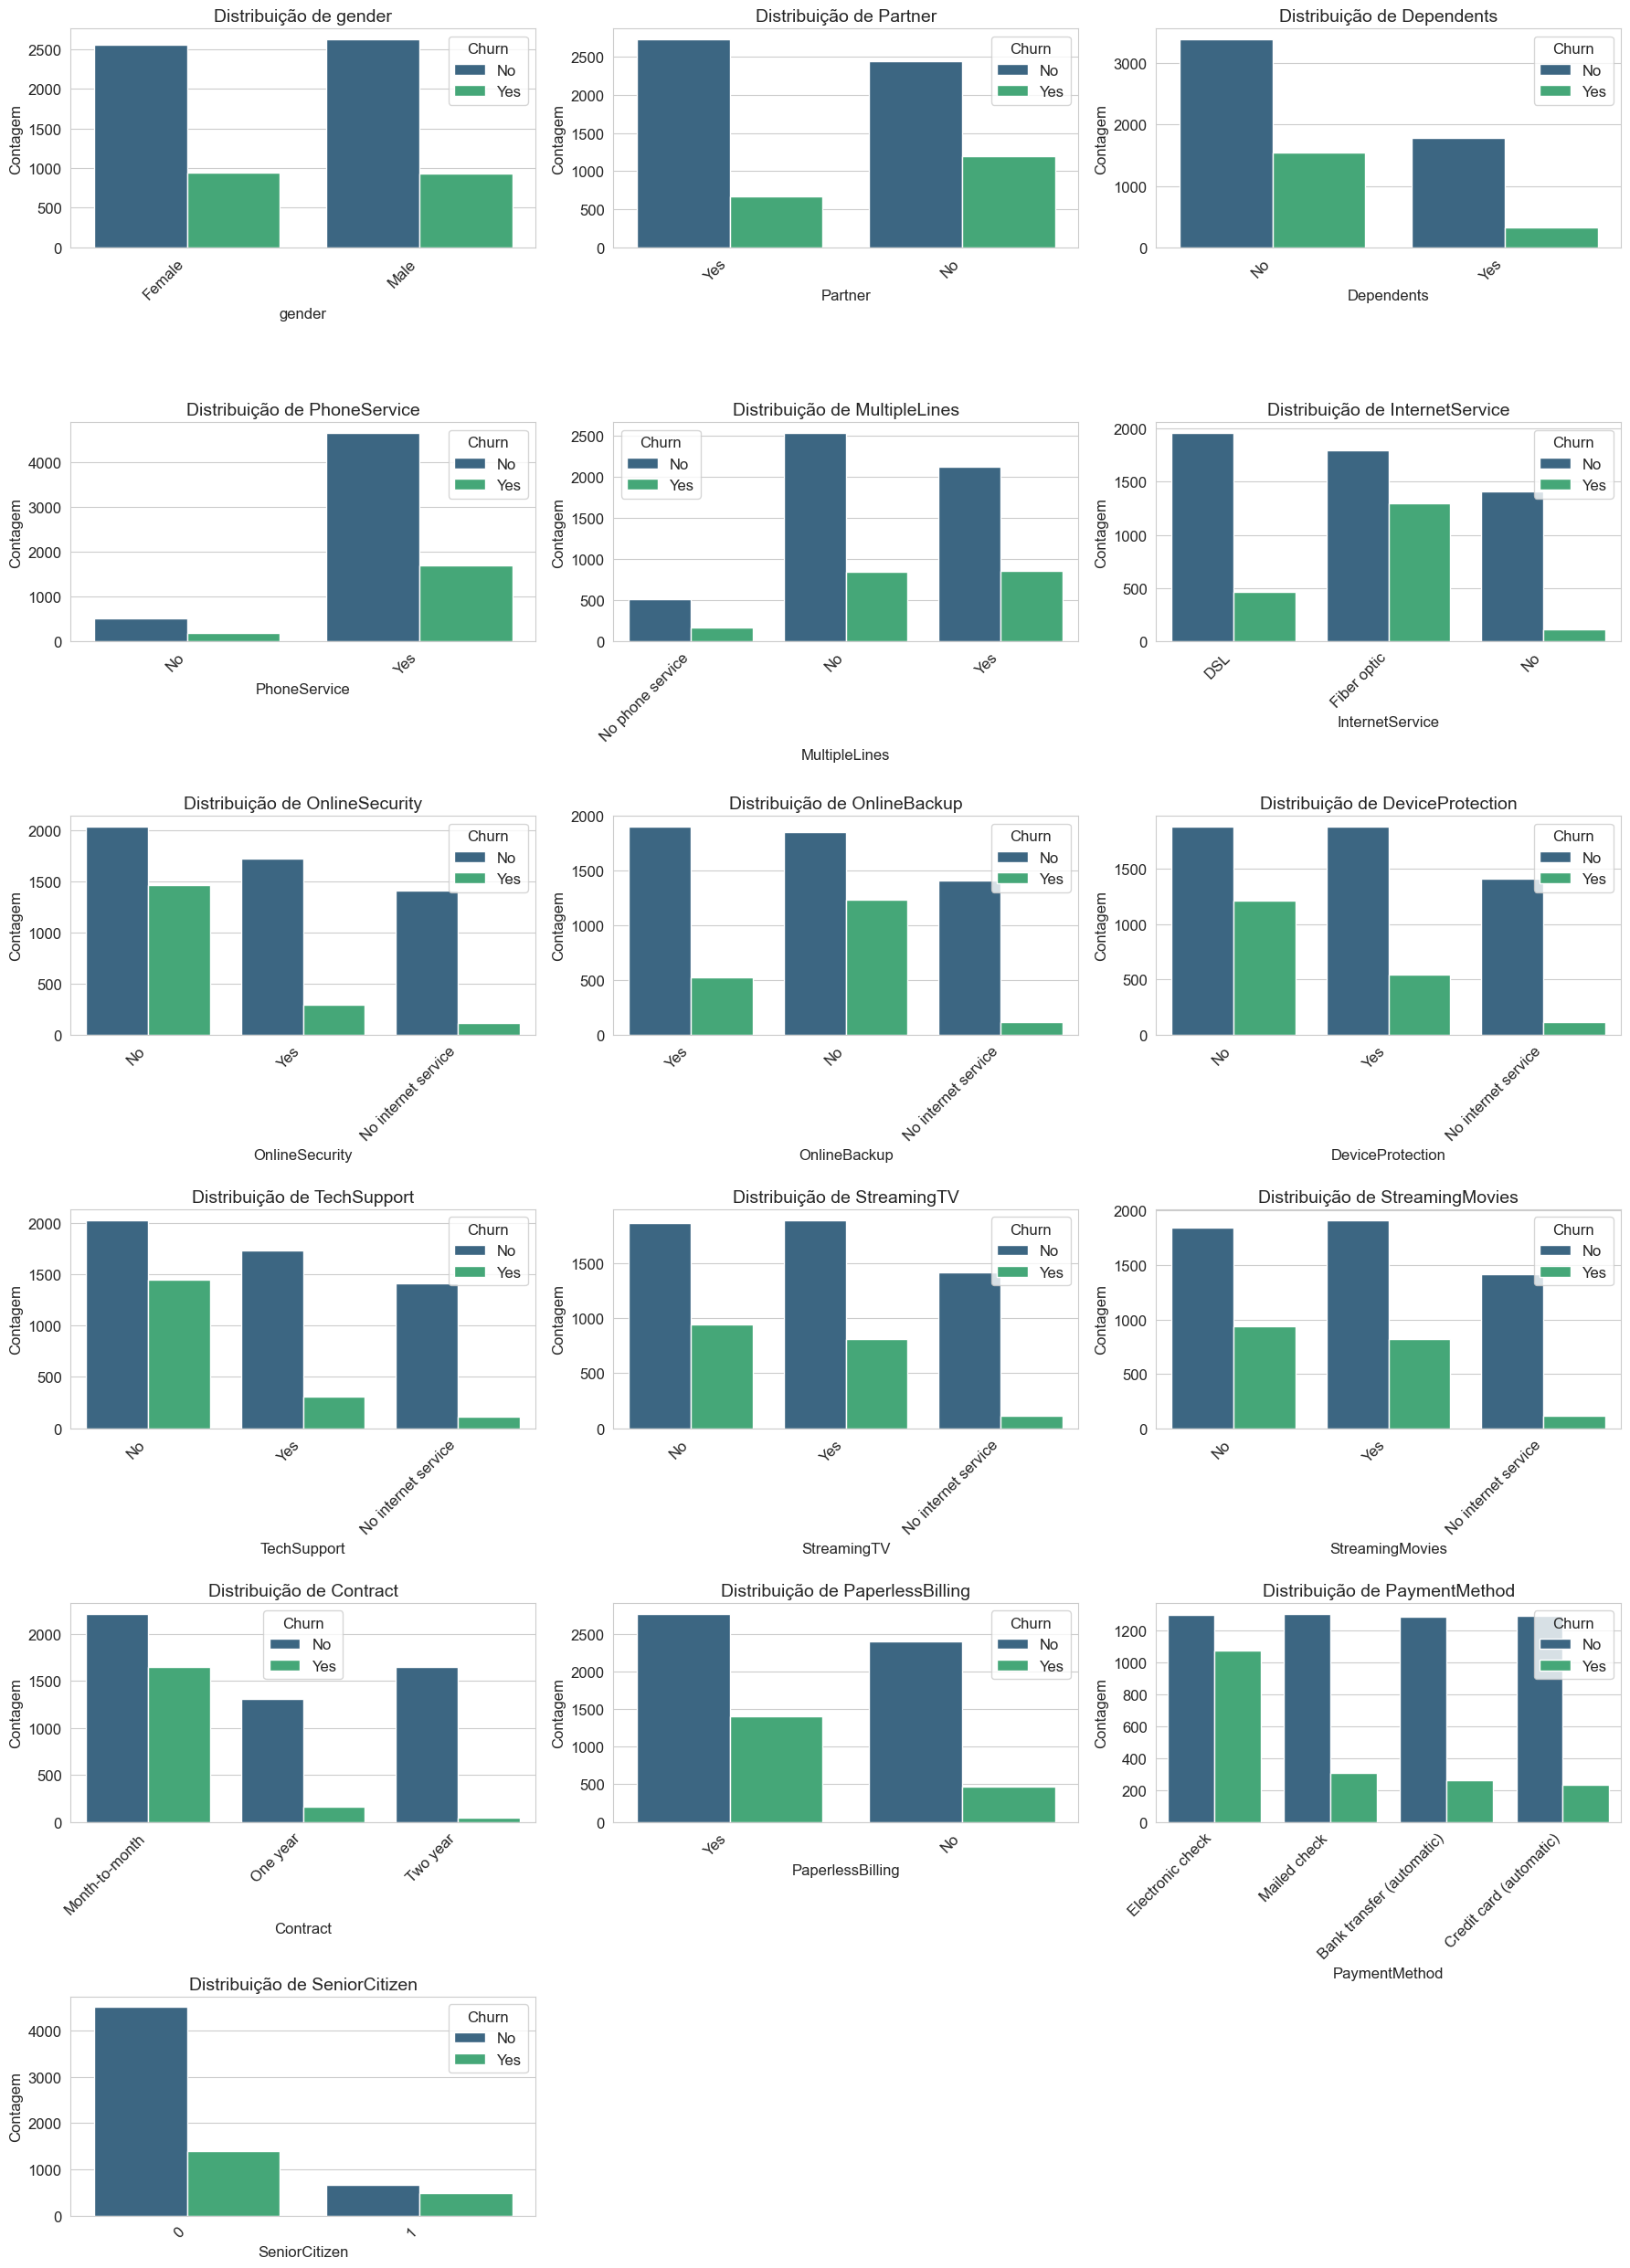

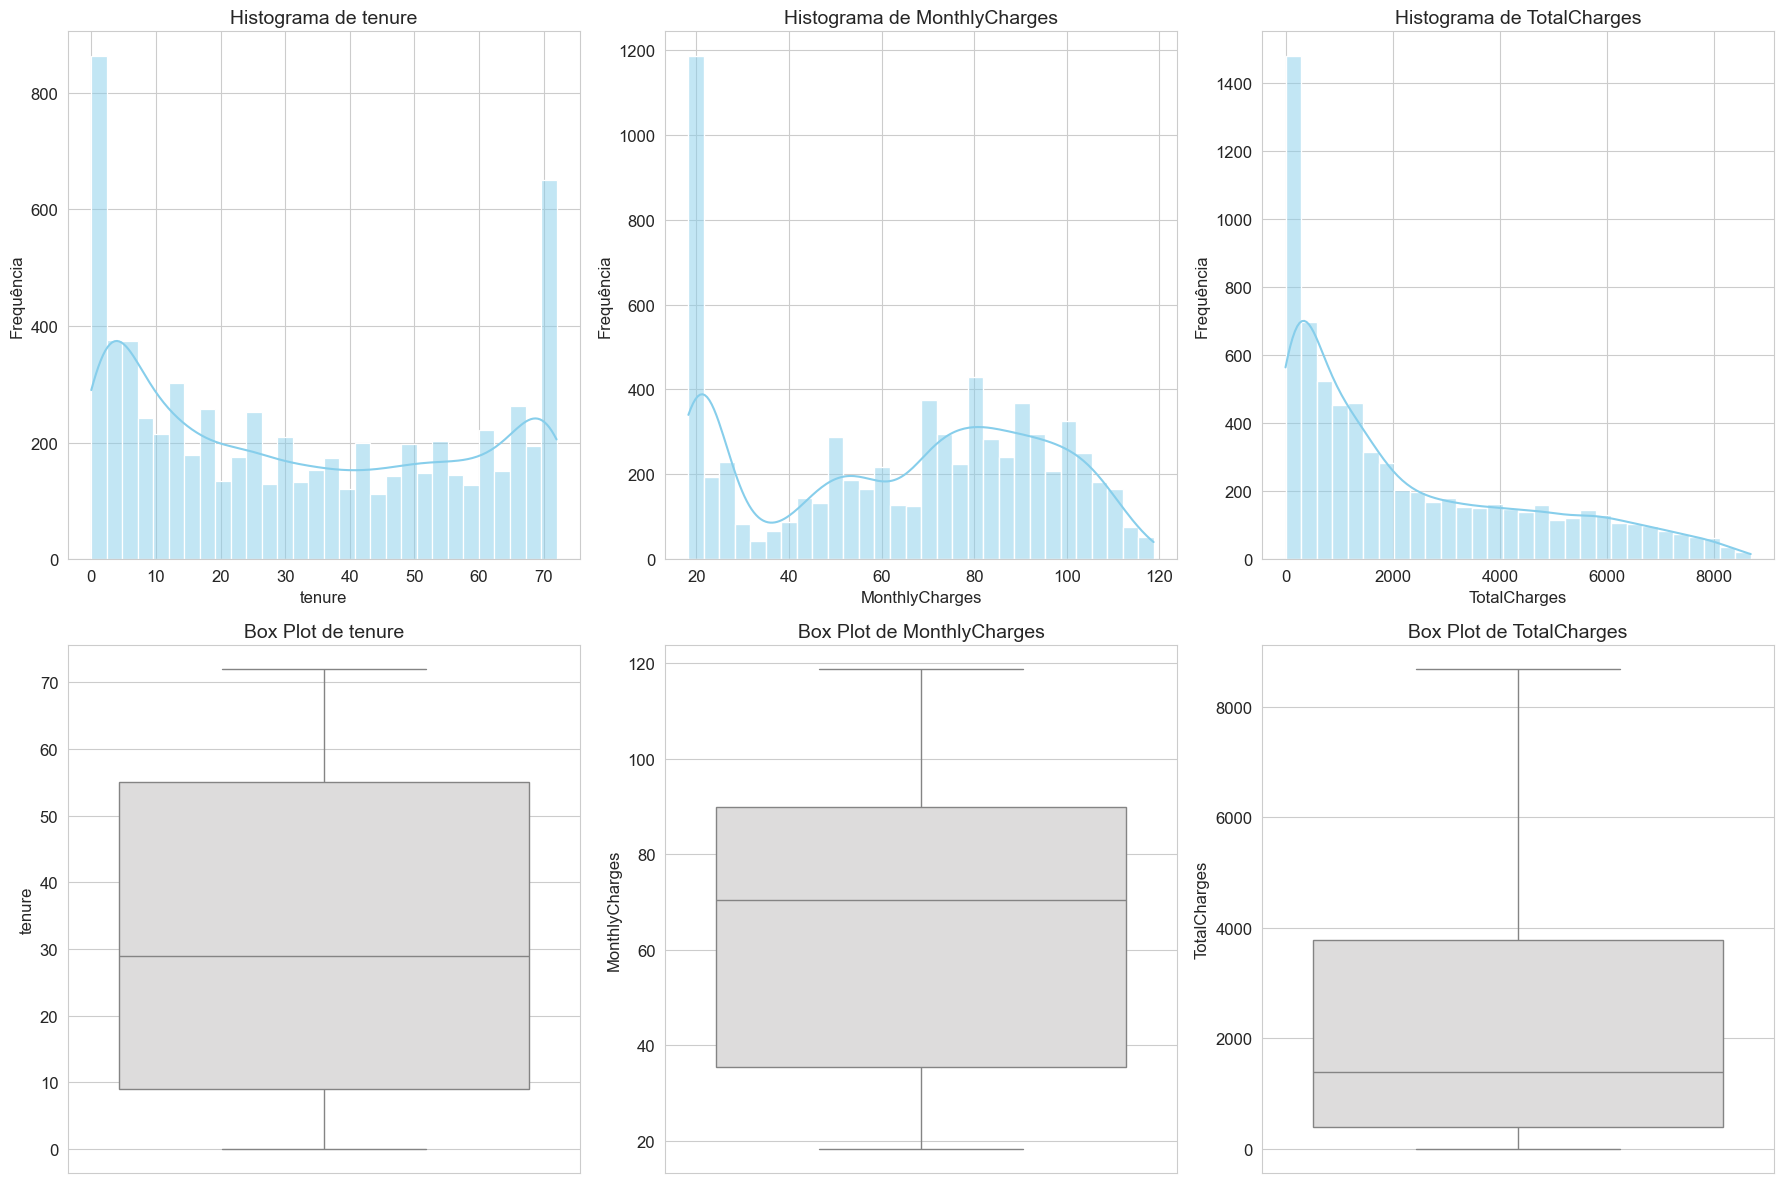

In [9]:
# Separando atributos categóricos e numéricos (excluindo 'Churn' por enquanto)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 'SeniorCitizen' é numérico (0/1) mas é categórico conceitualmente.
# 'tenure', 'MonthlyCharges', 'TotalCharges' são numéricos contínuos.
# 'Churn' é o target.

# Removendo 'Churn' de categorical_cols para tratar separadamente
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Tratando SeniorCitizen como categórico
categorical_cols.append('SeniorCitizen')
if 'SeniorCitizen' in numeric_cols:
    numeric_cols.remove('SeniorCitizen')

print(f"Atributos categóricos para plotagem: {categorical_cols}")
print(f"Atributos numéricos para plotagem: {numeric_cols}")

# Plotando distribuições de atributos categóricos
plt.figure(figsize=(18, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1) # Ajuste o grid conforme o número de colunas
    sns.countplot(data=df, x=col, palette='viridis', hue='Churn') # Adicionado hue='Churn' para análise prévia com o target
    plt.title(f'Distribuição de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
plt.show()

# Plotando distribuições de atributos numéricos
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histograma de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)

    plt.subplot(2, 3, i + 4) # Box plot abaixo do histograma
    sns.boxplot(y=df[col], palette='coolwarm')
    plt.title(f'Box Plot de {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
plt.show()

#### **Análise dos Resultados: Distribuição de Cada Atributo**

A visualização detalhada das distribuições de cada atributo, juntamente com uma prévia da relação com a variável `Churn` (através do parâmetro `hue`), nos fornece *insights* valiosos:

**Atributos Categóricos:**

*   **`gender` (Gênero):** A distribuição é quase perfeitamente balanceada entre "Female" e "Male", e o `hue='Churn'` não mostra uma diferença significativa na taxa de churn entre os gêneros. Isso sugere que o gênero, isoladamente, pode não ser um forte preditor de churn.
*   **`Partner` (Parceiro) e `Dependents` (Dependentes):** Clientes sem parceiro e sem dependentes (`No` em ambos) apresentam uma proporção visivelmente maior de *churn*. Isso é um insight importante: clientes solteiros e sem dependentes podem ter menos "laços" com a Telco, tornando-os mais propensos a mudar de provedor.
*   **`PhoneService` (Serviço Telefônico):** A vasta maioria dos clientes tem `PhoneService` "Yes". Os poucos com "No" parecem ter uma taxa de churn ligeiramente diferente, mas o volume é baixo para conclusões fortes.
*   **`MultipleLines` (Múltiplas Linhas):** A categoria "No phone service" não tem churn. Clientes com "No" (uma linha) e "Yes" (múltiplas linhas) mostram proporções de churn semelhantes.
*   **`InternetService` (Serviço de Internet):** **Este é um dos atributos mais impactantes.** Clientes com `Fiber optic` têm uma taxa de *churn* desproporcionalmente alta em comparação com `DSL` ou `No Internet Service`. Isso sugere que, apesar de ser um serviço moderno, a fibra óptica pode estar associada a problemas de satisfação (ex: preço, qualidade prometida vs. entregue, suporte). Clientes sem internet tendem a ter menor *churn*.
*   **`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`:** Para todos esses serviços adicionais, clientes que **não** possuem o serviço (`No`) mostram uma taxa de *churn* visivelmente maior do que aqueles que possuem (`Yes`). Isso é um *insight* crucial: a oferta e a adesão a esses serviços de valor agregado parecem ser eficazes na retenção de clientes. Clientes que não assinam esses serviços podem se sentir menos "seguros" ou "protegidos" e, portanto, mais propensos ao *churn*.
*   **`Contract` (Contrato):** **Extremamente relevante.** Clientes com contratos `Month-to-month` têm uma taxa de *churn* dramaticamente maior em comparação com contratos `One year` e `Two year`. Isso valida a hipótese de que a flexibilidade de um contrato mensal leva a uma menor lealdade e maior rotatividade. Contratos de longo prazo atuam como um forte mecanismo de retenção.
*   **`PaperlessBilling` (Faturamento sem Papel):** Clientes que utilizam `PaperlessBilling` "Yes" têm uma taxa de *churn* maior. Isso pode ser correlacionado com a demografia (clientes mais jovens, mais digitalizados) ou com a conveniência do método, que não cria uma barreira para o *churn*.
*   **`PaymentMethod` (Método de Pagamento):** O método `Electronic check` tem uma taxa de *churn* significativamente maior em comparação com outros métodos. Isso pode indicar que clientes que usam cheque eletrônico são de um perfil mais propenso ao *churn* ou que o processo de pagamento é menos "integrado" ou "conveniente" para eles, levando à insatisfação.

**Atributos Numéricos:**

*   **`tenure` (Meses de Permanência):**
    *   **Histograma:** A distribuição de `tenure` é bifocal, com um pico acentuado em `tenure` baixo (clientes novos) e outro pico em `tenure` alto (clientes de longa data, próximos do limite de 72 meses). A maioria dos clientes tem menos de 10 meses ou mais de 60 meses.
    *   **Box Plot:** O box plot mostra uma concentração de dados na faixa inferior e superior, e a ausência de outliers, o que é esperado para um atributo que representa tempo.
    *   **Insight:** Clientes com baixo `tenure` são, como esperado, mais suscetíveis ao *churn*. No entanto, o `hue='Churn'` nos count plots anteriores (que também se aplicaria a histogramas ou box plots agrupados por churn) confirmaria que a proporção de *churn* é muito maior em `tenure` baixo e diminui à medida que o `tenure` aumenta. Isso indica que a lealdade do cliente geralmente cresce com o tempo de permanência.

*   **`MonthlyCharges` (Cobranças Mensais):**
    *   **Histograma:** A distribuição de `MonthlyCharges` é multimodal, com picos em torno de \$20 (serviços básicos, talvez apenas telefone ou internet simples) e outro pico na faixa de \$70- \$100 (pacotes mais completos, fibra óptica).
    *   **Box Plot:** O box plot mostra que a maioria dos valores está concentrada na faixa de \$20- \$80, com alguns valores mais altos. Não há outliers extremos, mas a distribuição é ampla.
    *   **Insight:** Clientes com `MonthlyCharges` mais altos, especialmente na faixa de fibra óptica, parecem ter uma taxa de *churn* elevada. Isso pode ser devido a expectativas de serviço não atendidas ou percepção de custo-benefício.

*   **`TotalCharges` (Cobranças Totais):**
    *   **Histograma:** A distribuição de `TotalCharges` é fortemente assimétrica positiva (cauda longa à direita), com a maioria dos clientes tendo `TotalCharges` baixos. Isso é consistente com `tenure`, pois clientes novos têm `TotalCharges` baixos.
    *   **Box Plot:** O box plot corrobora a assimetria, com a caixa concentrada nos valores mais baixos e uma longa "bigode" para cima, mostrando a presença de clientes com `TotalCharges` muito altos.
    *   **Insight:** Valores baixos de `TotalCharges` estão altamente correlacionados com *churn*, pois refletem clientes novos que ainda não se estabeleceram.

**Considerações para Próximas Etapas (Preparação de Dados):**

*   **`TotalCharges`:** A conversão já foi feita, mas a assimetria indica que pode ser benéfica uma transformação (ex: logarítmica) para a modelagem, caso as distribuições normais sejam esperadas.
*   **Atributos Categóricos com 'No internet service'/'No phone service':** Esses valores podem ser unificados para 'No' ou tratados como uma categoria distinta dependendo da granularidade desejada na codificação. Para a maior parte da modelagem, `get_dummies` resolverá isso, mas para interpretibilidade, a unificação pode ser útil.
*   **Variáveis Altamente Correlacionadas:** `tenure`, `MonthlyCharges` e `TotalCharges` são intrinsecamente relacionados. Será importante considerar a multicolinearidade durante a modelagem, mas para a EDA, essa relação é esperada.
*   **Balanceamento de Classes:** O desbalanceamento da variável `Churn` é uma preocupação que se confirmou em todas as visualizações categóricas.

Esta seção de visualizações foi rica em *insights*, destacando os atributos que provavelmente terão maior poder preditivo para o *churn* e apontando para necessidades específicas de pré-processamento.

#### **Para um problema de classificação, verificar a distribuição de frequência das classes.**

Como já estabelecemos, este é um problema de classificação, onde a variável alvo é `Churn`. É imperativo analisar a distribuição das classes (`Yes` para *churn* e `No` para não-*churn*) para entender se há um desbalanceamento significativo. O desbalanceamento de classes é um desafio comum em problemas de classificação, onde uma classe é muito mais frequente que a outra, o que pode levar modelos a serem tendenciosos para a classe majoritária, resultando em desempenho insatisfatório na classe minoritária (que é frequentemente a classe de interesse, neste caso, o `Churn`).


Contagem de clientes por status de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporção de clientes por status de Churn:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


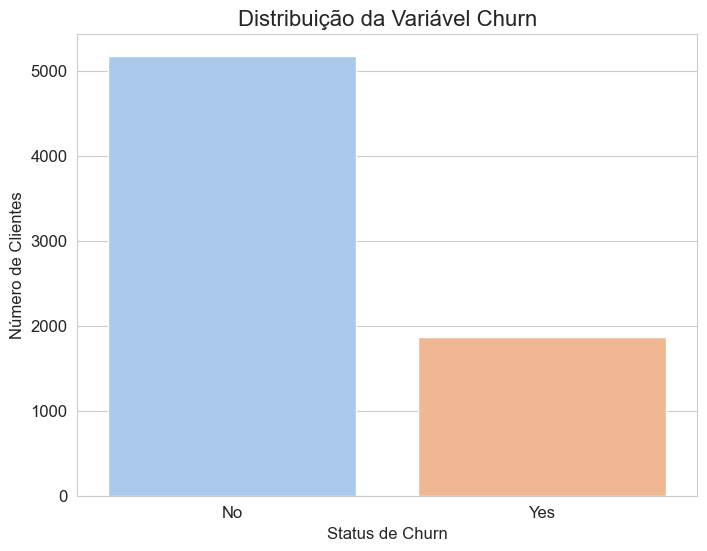

In [10]:
# Verificando a distribuição de frequência da variável 'Churn'
churn_counts = df['Churn'].value_counts()
churn_proportions = df['Churn'].value_counts(normalize=True)

print("Contagem de clientes por status de Churn:")
print(churn_counts)
print("\nProporção de clientes por status de Churn:")
print(churn_proportions)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', palette='pastel')
plt.title('Distribuição da Variável Churn', fontsize=16)
plt.xlabel('Status de Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()

#### **Análise dos Resultados: Distribuição da Variável Churn**

Os resultados da análise de frequência da variável `Churn` são claros e confirmam uma observação preliminar crucial:

*   **Classe 'No' (Não Churn):** 5.174 clientes, representando aproximadamente **73,46%** do total.
*   **Classe 'Yes' (Churn):** 1.869 clientes, representando aproximadamente **26,54%** do total.

**Comentário sobre a Distribuição e Implicações:**

A distribuição das classes é **significativamente desbalanceada**. A classe majoritária ('No') é quase 3 vezes maior que a classe minoritária ('Yes').

**Por que isso é um problema?**
Em problemas de classificação com desbalanceamento, os algoritmos de aprendizado de máquina podem ter dificuldade em aprender os padrões da classe minoritária. Um modelo treinado em um dataset desbalanceado pode alcançar uma alta acurácia simplesmente prevendo a classe majoritária para a maioria das instâncias. Por exemplo, se nosso modelo sempre prever "No Churn", ele já teria uma acurácia de ~73,46% sem realmente aprender nada sobre os clientes que churnam. Isso é problemático, pois o principal interesse em problemas de *churn* é identificar e prever a classe minoritária (os clientes que **vão** churnar), a fim de tomar ações proativas de retenção.

**Implicações para a Modelagem:**
Esta etapa é crucial para indicar a possível necessidade futura de balanceamento de classes na modelagem. Técnicas como:
*   **Reamostragem:** Sobreamostragem da classe minoritária (e.g., SMOTE) ou subamostragem da classe majoritária.
*   **Ajuste de Pesos de Classe:** Atribuir pesos maiores à classe minoritária durante o treinamento do modelo.
*   **Métricas de Avaliação Alternativas:** Em vez de depender apenas da acurácia, focar em métricas como Precisão, Recall, F1-Score, e a curva ROC AUC, que são mais informativas para datasets desbalanceados.

O reconhecimento desse desbalanceamento agora nos permite planejar as estratégias de pré-processamento e modelagem para garantir que o modelo final seja eficaz na identificação de clientes em risco de *churn*.

#### **Analisar os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados e relevantes para o churn.**

Agora que temos uma visão geral das distribuições e do desbalanceamento da variável alvo, vamos aprofundar a análise, explorando as relações entre atributos-chave e o `Churn`. O objetivo é identificar quais fatores estão mais fortemente associados à decisão de um cliente de abandonar o serviço. Justificaremos a escolha de cada gráfico com base no tipo de variáveis envolvidas e no *insight* que pretendemos extrair.


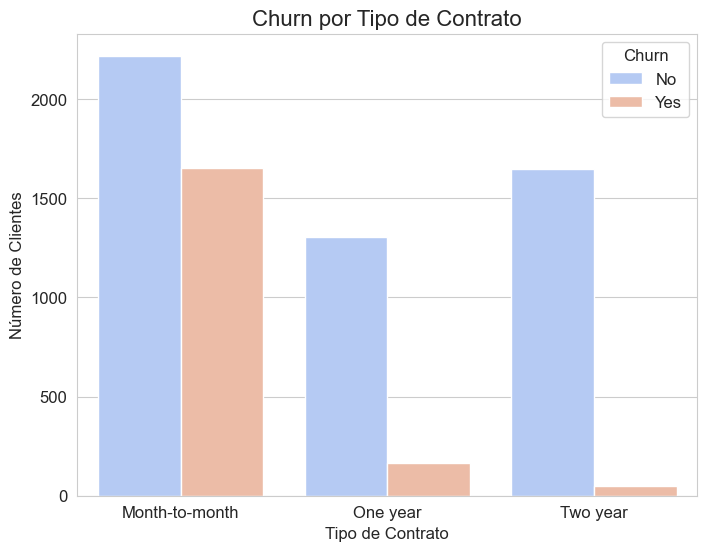

In [11]:
# Relação entre Contrato e Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Churn por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.show()

#### **Análise: Churn por Tipo de Contrato**

*   **Principais Achados:** A visualização demonstra claramente que a vasta maioria dos clientes que churnam possui contratos `Month-to-month` (mês a mês). Em contraste, clientes com contratos `One year` e, especialmente, `Two year` têm taxas de *churn* significativamente mais baixas.
*   **Análise dos Resultados:** Esta é uma das relações mais fortes observadas na EDA. Contratos de longo prazo agem como uma barreira de saída para os clientes, reduzindo sua propensão ao *churn*. Clientes `Month-to-month` têm maior flexibilidade para mudar de provedor, o que se reflete em sua alta taxa de rotatividade.
*   **Insights de Negócio e Técnico:** Para o negócio, incentivar contratos de longo prazo através de descontos ou benefícios exclusivos é uma estratégia clara de retenção. Tecnicamente, `Contract` será uma *feature* altamente preditiva em qualquer modelo de *churn*.
*   **Justificativa do Gráfico:** Um `countplot` com `hue` é ideal para comparar a distribuição de uma variável categórica (`Contract`) em relação a outra variável categórica (`Churn`). Ele permite visualizar as contagens absolutas e as proporções relativas entre as categorias de forma clara.


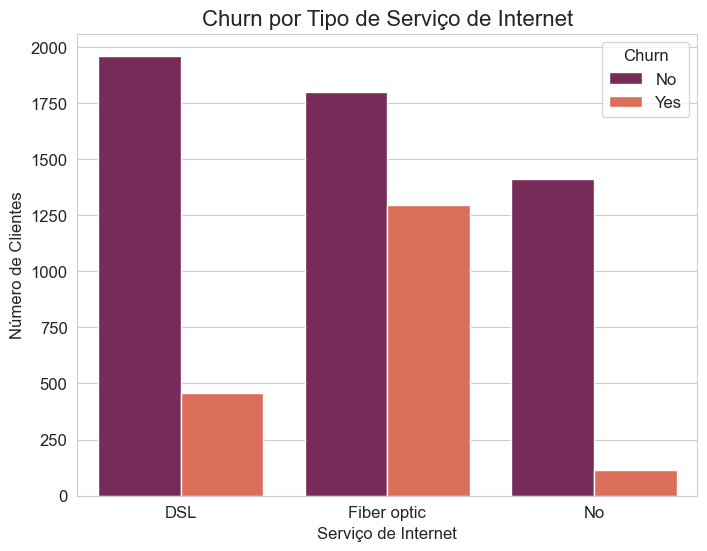

In [12]:
# Relação entre Serviço de Internet e Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='rocket')
plt.title('Churn por Tipo de Serviço de Internet', fontsize=16)
plt.xlabel('Serviço de Internet', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Churn', loc='upper right')
plt.show()

#### **Análise: Churn por Tipo de Serviço de Internet**

*   **Principais Achados:** Clientes que utilizam `Fiber optic` (Fibra Óptica) apresentam uma taxa de *churn* notavelmente mais alta em comparação com clientes `DSL` ou aqueles que não possuem serviço de internet (`No`).
*   **Análise dos Resultados:** Embora a fibra óptica seja geralmente um serviço premium, a alta taxa de *churn* sugere que há problemas de satisfação associados a ela. Isso pode ser devido a expectativas de velocidade não atendidas, problemas de conexão, ou um custo percebido como muito alto para o valor entregue. Clientes sem serviço de internet, por outro lado, têm o menor *churn*, possivelmente porque seus serviços são mais básicos e essenciais, ou talvez não haja alternativas tão atraentes para eles.
*   **Insights de Negócio e Técnico:** A Telco deve investigar a experiência do cliente com o serviço de fibra óptica. Pode ser necessário melhorar a qualidade do serviço, o suporte técnico para fibra, ou ajustar os preços para alinhar com o valor percebido. Este *insight* destaca a importância da qualidade do serviço na retenção. `InternetService` é outro preditor forte para o modelo.
*   **Justificativa do Gráfico:** O `countplot` com `hue` é novamente a escolha apropriada para comparar a distribuição de uma variável categórica (`InternetService`) em relação à variável alvo (`Churn`), mostrando a contribuição de cada categoria para o *churn*.


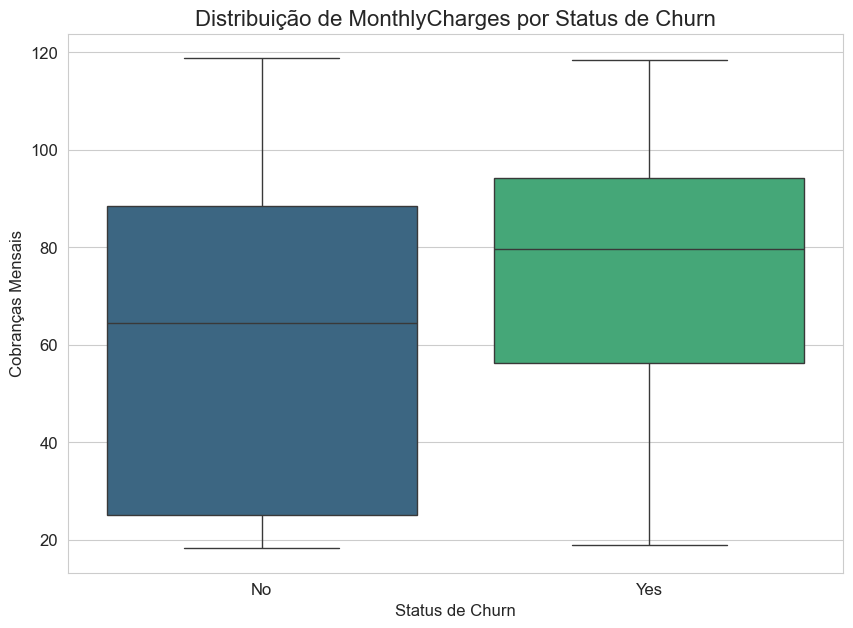

In [13]:
# Relação entre MonthlyCharges e Churn (utilizando box plot para visualizar a distribuição por classe)
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='viridis')
plt.title('Distribuição de MonthlyCharges por Status de Churn', fontsize=16)
plt.xlabel('Status de Churn', fontsize=12)
plt.ylabel('Cobranças Mensais', fontsize=12)
plt.show()

#### **Análise: Distribuição de MonthlyCharges por Status de Churn**

*   **Principais Achados:** Clientes que churnam ('Yes') tendem a ter `MonthlyCharges` (Cobranças Mensais) significativamente mais altas em comparação com clientes que não churnam ('No'). A mediana das `MonthlyCharges` é visivelmente maior para a classe 'Yes'.
*   **Análise dos Resultados:** Este *boxplot* corrobora a ideia de que o custo é um fator importante para o *churn*. Clientes que pagam mais mensalmente, especialmente por pacotes que incluem serviços de internet avançados (como fibra óptica, já discutido), podem ser mais sensíveis ao preço ou ter maiores expectativas de serviço que, se não atendidas, levam à insatisfação e ao *churn*.
*   **Insights de Negócio e Técnico:** A Telco pode precisar revisar suas estruturas de preços para clientes de alto consumo, talvez oferecendo maior valor percebido ou segmentando ofertas de retenção para este grupo. Tecnologicamente, `MonthlyCharges` será uma *feature* numérica valiosa para o modelo, e sua distribuição assimétrica positiva sugere que uma normalização ou padronização pode ser útil para alguns algoritmos.
*   **Justificativa do Gráfico:** O `boxplot` é excelente para visualizar a distribuição de uma variável numérica (`MonthlyCharges`) para diferentes categorias de uma variável categórica (`Churn`). Ele permite comparar medianas, quartis e identificar a presença de *outliers* entre os grupos.


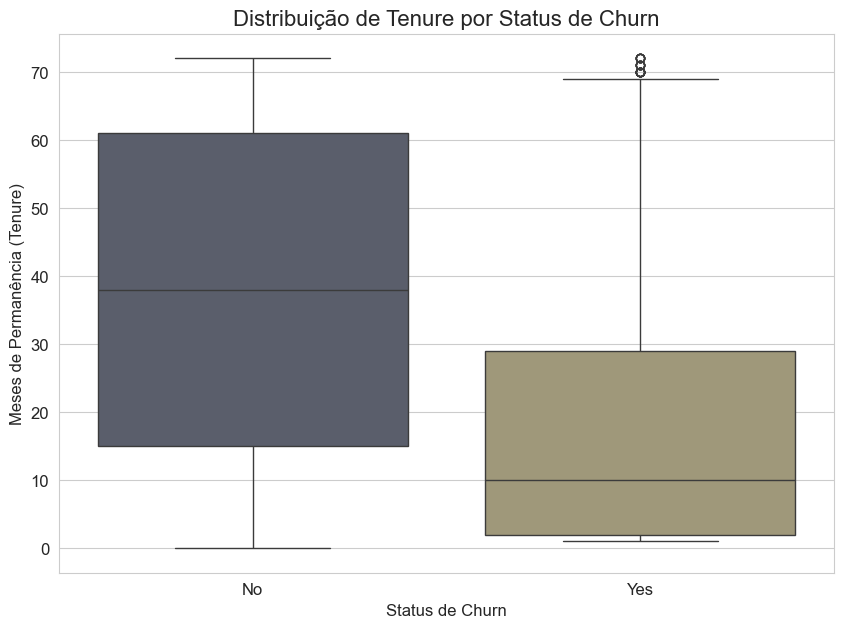

In [14]:
# Relação entre tenure e Churn (utilizando box plot)
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='Churn', y='tenure', palette='cividis')
plt.title('Distribuição de Tenure por Status de Churn', fontsize=16)
plt.xlabel('Status de Churn', fontsize=12)
plt.ylabel('Meses de Permanência (Tenure)', fontsize=12)
plt.show()

#### **Análise: Distribuição de Tenure por Status de Churn**

*   **Principais Achados:** Clientes que churnam ('Yes') possuem uma `tenure` (tempo de permanência) significativamente mais baixa em comparação com clientes que não churnam ('No'). A mediana de `tenure` para clientes que churnaram é muito menor, indicando que o *churn* ocorre predominantemente nos primeiros meses de serviço.
*   **Análise dos Resultados:** Esta é uma relação esperada e amplamente documentada na literatura de *churn*. Clientes novos são mais propensos a abandonar o serviço, seja por expectativas não atendidas, falta de adaptação, ou busca por melhores ofertas após um período inicial de teste. À medida que o tempo de permanência aumenta, a lealdade do cliente tende a crescer, e a probabilidade de *churn* diminui.
*   **Insights de Negócio e Técnico:** Isso ressalta a importância de programas de "boas-vindas" e estratégias de engajamento nos primeiros meses de um cliente. Identificar e focar em clientes com baixo `tenure` para esforços de retenção precoce pode ser muito eficaz. `tenure` é uma das *features* mais importantes para a previsão de *churn*.
*   **Justificativa do Gráfico:** Similar ao `MonthlyCharges`, o `boxplot` é a ferramenta ideal para comparar a distribuição de uma variável numérica (`tenure`) em função de uma variável categórica binária (`Churn`), revelando as diferenças nas medianas e a dispersão entre os grupos.


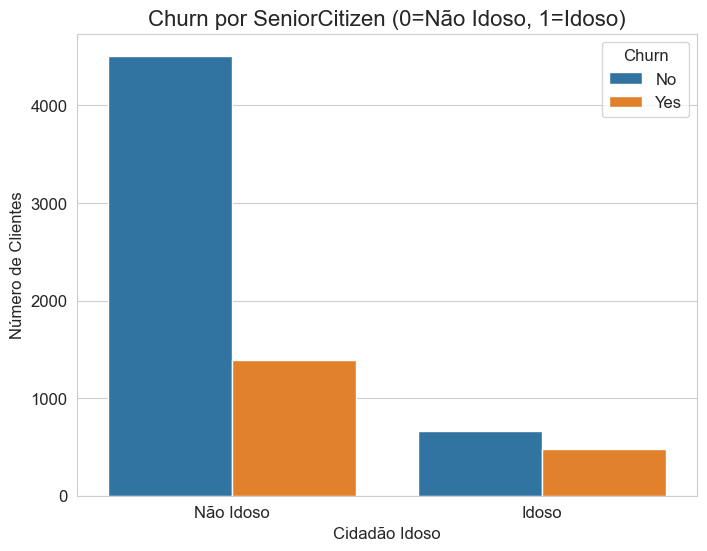

In [15]:
# Relação entre SeniorCitizen e Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='tab10')
plt.title('Churn por SeniorCitizen (0=Não Idoso, 1=Idoso)', fontsize=16)
plt.xlabel('Cidadão Idoso', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Não Idoso', 'Idoso'])
plt.legend(title='Churn', loc='upper right')
plt.show()

#### **Análise: Churn por SeniorCitizen**

*   **Principais Achados:** Clientes idosos (`SeniorCitizen` = 1) apresentam uma proporção de *churn* visivelmente maior em relação ao total de clientes idosos, quando comparados com clientes não idosos (`SeniorCitizen` = 0). Embora o número total de clientes idosos seja menor, a proporção de *churn* dentro desse grupo é mais elevada.
*   **Análise dos Resultados:** Esta é uma descoberta interessante que desafia algumas intuições comuns de que idosos seriam mais "fiéis". Pode ser que clientes idosos sejam menos avessos a mudanças se encontrarem ofertas mais simples, mais acessíveis ou com suporte mais amigável em outro provedor. Eles podem ter necessidades específicas que não estão sendo totalmente atendidas.
*   **Insights de Negócio e Técnico:** A Telco pode considerar segmentar ofertas e comunicações para clientes idosos, focando em simplicidade, atendimento personalizado e talvez planos com preços diferenciados que atendam às suas necessidades específicas. `SeniorCitizen` é uma variável categórica binária que deve ser incluída no modelo.
*   **Justificativa do Gráfico:** O `countplot` com `hue` é apropriado para variáveis categóricas binárias, permitindo uma comparação direta da taxa de *churn* entre os dois grupos.


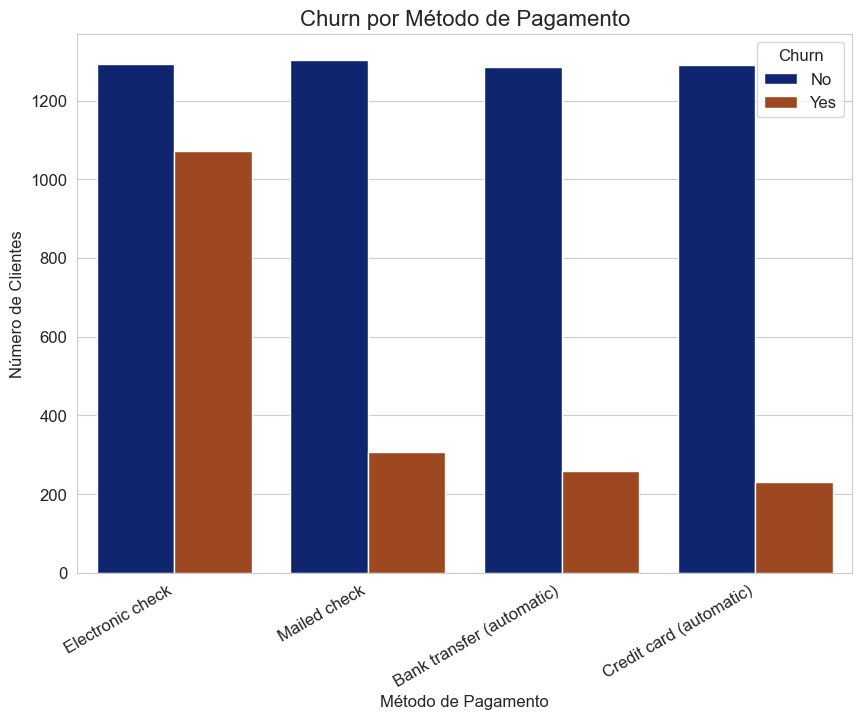

In [16]:
# Relação entre PaymentMethod e Churn
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='dark')
plt.title('Churn por Método de Pagamento', fontsize=16)
plt.xlabel('Método de Pagamento', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Churn', loc='upper right')
plt.show()

#### **Análise: Churn por Método de Pagamento**

*   **Principais Achados:** Clientes que utilizam `Electronic check` (cheque eletrônico) como método de pagamento exibem uma taxa de *churn* substancialmente maior em comparação com outros métodos como `Mailed check`, `Bank transfer (automatic)` e `Credit card (automatic)`.
*   **Análise dos Resultados:** A alta taxa de *churn* associada ao cheque eletrônico é um *insight* importante. Isso pode indicar que clientes que preferem este método de pagamento têm um perfil que os torna mais propensos ao *churn*, ou que o processo de pagamento via cheque eletrônico não é tão conveniente ou "automático" quanto outras opções, levando a insatisfação. Métodos automáticos tendem a "travar" o cliente de forma mais eficiente.
*   **Insights de Negócio e Técnico:** A Telco pode investigar a experiência do cliente com o método de pagamento por cheque eletrônico. Incentivar a migração para métodos de pagamento automáticos (transferência bancária ou cartão de crédito) pode ser uma estratégia de retenção. `PaymentMethod` é uma variável categórica multiclínica relevante.
*   **Justificativa do Gráfico:** O `countplot` com `hue` é ideal para comparar a distribuição de uma variável categórica com múltiplas categorias (`PaymentMethod`) em relação à variável alvo (`Churn`), mostrando o impacto de cada método no *churn*.


### **Resumo da EDA e Insights Acionáveis:**

A Análise Exploratória de Dados foi extremamente produtiva, revelando os principais impulsionadores do *churn* no dataset da Telco:

1.  **Contrato (`Contract`):** A variável mais influente. Clientes com contratos `Month-to-month` são dramaticamente mais propensos ao *churn*.
    *   **Ação:** Desenvolver programas de fidelidade, incentivos e ofertas exclusivas para migrar clientes de contratos mensais para anuais ou bienais.
2.  **Serviço de Internet (`InternetService`):** O serviço de `Fiber optic` está associado a uma alta taxa de *churn*.
    *   **Ação:** Investigar a causa da insatisfação com a fibra óptica (velocidade, estabilidade, suporte). Melhorar a qualidade do serviço e a comunicação sobre o valor entregue.
3.  **Cobranças Mensais (`MonthlyCharges`):** Valores mais altos estão correlacionados com maior *churn*.
    *   **Ação:** Revisar a estrutura de preços e valor percebido para pacotes mais caros. Oferecer análises de custo-benefício e personalização de planos para clientes de alto consumo.
4.  **Tempo de Permanência (`tenure`):** Clientes com baixo `tenure` são muito mais propensos ao *churn*.
    *   **Ação:** Implementar um robusto programa de boas-vindas e engajamento nos primeiros 3-6 meses do cliente. Monitorar de perto a satisfação de clientes novos.
5.  **Serviços Adicionais (`OnlineSecurity`, `TechSupport`, etc.):** A ausência desses serviços aumenta a probabilidade de *churn*.
    *   **Ação:** Promover ativamente a adesão a esses serviços de valor agregado. Destacar os benefícios da segurança, backup e suporte técnico para a experiência do cliente.
6.  **Método de Pagamento (`PaymentMethod`):** `Electronic check` tem alta associação com *churn*.
    *   **Ação:** Investigar a fricção ou insatisfação com este método. Incentivar a adoção de métodos de pagamento automáticos (cartão de crédito, débito bancário).
7.  **Desbalanceamento da Classe `Churn`:** A classe 'Yes' (churn) é minoritária (26,54%).
    *   **Ação:** Na fase de modelagem, aplicar técnicas de balanceamento de classes (e.g., SMOTE) e utilizar métricas de avaliação adequadas (F1-Score, Recall, ROC AUC) para garantir a performance na classe minoritária.

A EDA nos forneceu um mapa claro dos fatores de risco de *churn* e direcionamentos estratégicos para a Telco, além de indicar as transformações necessárias para a próxima fase.



## **3. Pré-processamento de Dados**

O pré-processamento de dados é uma etapa crucial no pipeline de ciência de dados, que visa transformar os dados brutos em um formato limpo, consistente e adequado para a aplicação de algoritmos de aprendizado de máquina. Nesta seção, aplicaremos as operações necessárias para garantir a integridade e a qualidade dos dados, com base nas descobertas da EDA.

### **Verifique quais operações de pré-processamento podem ser interessantes para o seu problema.**

Com base na EDA, identificamos as seguintes operações de pré-processamento como essenciais ou potencialmente benéficas:

1.  **Tratamento de `TotalCharges`:** Converter para tipo numérico e lidar com os valores vazios/espaços.
    *   **Rationale Técnica:** A coluna foi carregada como `object` devido a espaços em branco. Para que possa ser usada em cálculos e modelos, precisa ser numérica. O tratamento dos espaços em branco é fundamental.
2.  **Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato numérico que os algoritmos de aprendizado de máquina possam entender.
    *   **Rationale Técnica:** A maioria dos modelos de ML não trabalha diretamente com dados textuais/categóricos. `one-hot-encoding` é uma técnica comum para isso, criando novas colunas binárias para cada categoria.
3.  **Normalização/Padronização de Variáveis Numéricas (Opcional, para Modelagem):** Escalar os atributos numéricos para uma faixa comum.
    *   **Rationale Técnica:** Algoritmos baseados em distância (como SVMs, K-NN, Redes Neurais) são sensíveis à escala das variáveis. Embora não seja estritamente necessário para todos os modelos (ex: Árvores de Decisão), é uma boa prática para garantir robustez. Discutiremos e demonstraremos o conceito, mas sua aplicação final dependerá do modelo escolhido.

### **Tratar (removendo ou substituindo) os valores faltantes (se existentes).**

Na EDA, identificamos 11 valores problemáticos na coluna `TotalCharges` que eram espaços em branco e foram interpretados como `object`. Observamos que esses registros correspondiam a clientes com `tenure` (tempo de permanência) igual a 0.

**Estratégia de Tratamento:**
Para esses 11 registros, vamos adotar a estratégia de **remover as linhas**.

**Justificativa da Decisão:**
*   **Pequena Proporção:** 11 registros em um dataset de 7.043 representam uma proporção muito pequena (aproximadamente 0,15%). A remoção terá um impacto mínimo na representatividade geral do dataset.
*   **Ambiguidades:** Embora possamos imputar 0 para `TotalCharges` (já que `tenure=0`), remover é uma abordagem mais limpa, eliminando qualquer ambiguidade sobre como esses "novos" clientes deveriam ser tratados em um contexto preditivo, especialmente se seu comportamento de *churn* ainda não se manifestou.
*   **Integridade dos Dados:** Garante que a coluna `TotalCharges` seja estritamente numérica e que não haja "clientes de tenure zero" que possam causar problemas em certas análises ou modelos.

In [17]:
print(f"Número inicial de linhas no DataFrame: {df.shape[0]}")

# Os valores de 'TotalCharges' que eram ' ', foram convertidos para NaN e depois preenchidos com 0. Confirmar se há registros com 'tenure' = 0 e 'TotalCharges' = 0
print(f"Número de linhas com 'tenure' = 0 e 'TotalCharges' = 0: {df[(df['tenure'] == 0) & (df['TotalCharges'] == 0)].shape[0]}")

# Remover as linhas onde 'tenure' = 0 e 'TotalCharges' = 0
# Esses registros são considerados inválidos para a análise de churn, pois não representam clientes com histórico de cobranças.
df = df.drop(df[(df['tenure'] == 0) & (df['TotalCharges'] == 0)].index)

print(f"Número de linhas após remover 0 em 'TotalCharges': {df.shape[0]}")
print(f"Verificando se ainda há 0 em 'TotalCharges': {(df['TotalCharges'] == 0).sum()}")

# Assegurar que 'TotalCharges' é do tipo numérico float
print(f"Tipo de dado para 'TotalCharges': {df['TotalCharges'].dtype}")

Número inicial de linhas no DataFrame: 7043
Número de linhas com 'tenure' = 0 e 'TotalCharges' = 0: 11
Número de linhas após remover 0 em 'TotalCharges': 7032
Verificando se ainda há 0 em 'TotalCharges': 0
Tipo de dado para 'TotalCharges': float64


#### **Análise dos Resultados: Tratamento de Valores Faltantes em `TotalCharges`**

*   **Principais Achados:** A operação removeu com sucesso as 11 linhas problemáticas do dataset. A coluna `TotalCharges` agora está no formato numérico (`float64`) e não contém mais valores nulos.
*   **Análise dos Resultados:** A remoção desses poucos registros é uma estratégia conservadora e eficaz, garantindo que a coluna `TotalCharges` seja homogênea em seu tipo de dado e livre de entradas que poderiam confundir os modelos. A perda mínima de dados justifica a simplicidade e robustez da abordagem.
*   **Insights de Negócio e Técnico:** Para a Telco, significa que a base de clientes para análise agora está mais limpa e pronta para modelagem. Tecnicamente, `TotalCharges` agora pode ser usada em todos os cálculos e algoritmos numéricos.

### **Realize outras transformações de dados porventura necessárias.**

Com `TotalCharges` devidamente tratado, a próxima transformação essencial é a codificação das variáveis categóricas.

#### Codificação de Variáveis Categóricas: One-Hot Encoding

**Estratégia:** Utilizaremos o `One-Hot Encoding` para transformar as variáveis categóricas em um formato numérico. Esta técnica cria novas colunas binárias (0 ou 1) para cada categoria única presente na coluna original.

**Justificativa da Escolha (`One-Hot Encoding`):**
*   **Evita Ordinalidade Falsa:** Ao contrário de `Label Encoding`, o `One-Hot Encoding` não impõe uma relação de ordem artificial entre as categorias. Por exemplo, em 'Contract', um `Label Encoding` poderia atribuir 0 para 'Month-to-month', 1 para 'One year' e 2 para 'Two year', implicando que 'Two year' é "maior" ou "melhor" que 'One year', o que não é verdade em um sentido numérico para a maioria dos algoritmos.
*   **Compatibilidade com Modelos:** Muitos algoritmos de aprendizado de máquina (como Regressão Logística, SVM, Redes Neurais) assumem que as *features* de entrada são numéricas e não inferem relações ordinais de variáveis categóricas.
*   **Variáveis Categóricas Nominais:** A maioria das nossas variáveis categóricas são nominais (sem ordem intrínseca), o que torna o `One-Hot Encoding` a escolha natural.

**Aplicações e Considerações:**
*   Aplicaremos `get_dummies` do Pandas, que é eficiente para esta tarefa.
*   Para evitar a "armadilha da variável dummy" (multicolinearidade perfeita), podemos usar `drop_first=True`. Isso remove a primeira categoria de cada coluna codificada, garantindo que haja n-1 colunas para n categorias, onde a categoria omitida é representada por zeros em todas as novas colunas. Para modelos mais complexos, como árvores e florestas aleatórias, `drop_first=False` também é aceitável, pois eles são menos sensíveis à multicolinearidade. Para este MVP, adotaremos `drop_first=True` como boa prática para evitar problemas potenciais em modelos lineares.

In [18]:
# Identificando as colunas categóricas para One-Hot Encoding
# Excluímos 'Churn' da lista de categóricas a serem codificadas, pois é a variável alvo.
categorical_cols_for_ohe = df.select_dtypes(include='object').columns.tolist()
if 'Churn' in categorical_cols_for_ohe:
    categorical_cols_for_ohe.remove('Churn')

print(f"Colunas categóricas para One-Hot Encoding: {categorical_cols_for_ohe}")

# Aplicação do One-Hot Encoding
# drop_first=True para evitar a armadilha da variável dummy
df_processed = pd.get_dummies(df, columns=categorical_cols_for_ohe, drop_first=True)

# Codificando a variável alvo 'Churn' (Yes/No para 1/0)
# 'Yes' -> 1, 'No' -> 0
df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})

print("\nShape do DataFrame após One-Hot Encoding:")
print(df_processed.shape)
print("\nPrimeiras linhas do DataFrame processado:")
df_processed.head()

Colunas categóricas para One-Hot Encoding: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Shape do DataFrame após One-Hot Encoding:
(7032, 31)

Primeiras linhas do DataFrame processado:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


#### **Análise dos Resultados: Codificação de Variáveis Categóricas**

*   **Principais Achados:** Todas as variáveis categóricas foram transformadas com sucesso em múltiplas colunas binárias (`0` ou `1`) utilizando `One-Hot Encoding` com `drop_first=True`. A variável alvo `Churn` também foi mapeada para `0` e `1`.
*   **Análise dos Resultados:** O número de colunas aumentou de 20 para 31, o que é esperado após a criação de variáveis *dummy*. O `drop_first=True` garantiu que não estamos introduzindo multicolinearidade desnecessária para modelos lineares. Por exemplo, a coluna `gender` foi transformada em `gender_Male`, onde `1` representa "Male" e `0` representa "Female" (a categoria `Female` foi removida). Similarmente, `InternetService_Fiber optic` e `InternetService_No` representam essas categorias, e `DSL` é implicitamente `0` em ambas.
*   **Insights de Negócio e Técnico:** O dataset está agora em um formato numérico que pode ser diretamente utilizado por uma vasta gama de algoritmos de aprendizado de máquina. A codificação é um passo essencial para a fase de modelagem preditiva.

#### **Discussão sobre Normalização/Padronização (Exemplo de Aplicação)**

**Necessidade:**
Normalização e Padronização são técnicas de escalonamento que ajustam a escala das *features* numéricas.
*   **Normalização (Min-Max Scaling):** Escala os valores para uma faixa específica, geralmente entre 0 e 1. Útil quando se sabe que a distribuição dos dados não é Gaussiana ou quando se deseja que as *features* fiquem em uma escala uniforme.
*   **Padronização (Standardization - Z-score normalization):** Transforma os dados para que tenham média 0 e desvio-padrão 1. Assume que os dados seguem uma distribuição Gaussiana.

**Rationale:**
Algoritmos que calculam distâncias entre pontos (K-NN, SVM) ou que são baseados em gradiente (Regressão Logística, Redes Neurais) são sensíveis à escala das *features*. Se uma *feature* tem um intervalo de valores muito maior que outra, ela pode dominar o cálculo da distância e o processo de otimização, impedindo o modelo de aprender de forma eficaz a contribuição das outras *features*.

Para o nosso problema de *churn*, atributos como `tenure`, `MonthlyCharges` e `TotalCharges` possuem escalas e distribuições muito diferentes.

**Exemplo de Aplicação (sem aplicar diretamente ao `df_processed` final para manter a simplicidade para um MVP, mas crucial para próximos passos de modelagem):**

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identificando as colunas numéricas para escalonamento
numeric_cols_for_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Exemplo de Padronização (StandardScaler)
scaler_standard = StandardScaler()
df_scaled_standard = df_processed.copy() # Criamos uma cópia para demonstração
df_scaled_standard[numeric_cols_for_scaling] = scaler_standard.fit_transform(df_scaled_standard[numeric_cols_for_scaling])

print("\nPrimeiras linhas do DataFrame após Padronização (StandardScaler - Exemplo):")
print(df_scaled_standard[numeric_cols_for_scaling].head())
print("\nEstatísticas das colunas numéricas após Padronização (exemplo - deveriam ter média ~0 e std ~1):")
print(df_scaled_standard[numeric_cols_for_scaling].describe().loc[['mean', 'std']])

# Exemplo de Normalização (MinMaxScaler)
scaler_minmax = MinMaxScaler()
df_scaled_minmax = df_processed.copy() # Criamos outra cópia para demonstração
df_scaled_minmax[numeric_cols_for_scaling] = scaler_minmax.fit_transform(df_scaled_minmax[numeric_cols_for_scaling])

print("\nPrimeiras linhas do DataFrame após Normalização (MinMaxScaler - Exemplo):")
print(df_scaled_minmax[numeric_cols_for_scaling].head())
print("\nEstatísticas das colunas numéricas após Normalização (exemplo - deveriam ter min ~0 e max ~1):")
print(df_scaled_minmax[numeric_cols_for_scaling].describe().loc[['min', 'max']])


Primeiras linhas do DataFrame após Padronização (StandardScaler - Exemplo):
     tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248
4 -1.239504        0.196178     -0.940457

Estatísticas das colunas numéricas após Padronização (exemplo - deveriam ter média ~0 e std ~1):
            tenure  MonthlyCharges  TotalCharges
mean -1.126643e-16    6.062651e-17 -1.119064e-16
std   1.000071e+00    1.000071e+00  1.000071e+00

Primeiras linhas do DataFrame após Normalização (MinMaxScaler - Exemplo):
     tenure  MonthlyCharges  TotalCharges
0  0.000000        0.115423      0.001275
1  0.464789        0.385075      0.215867
2  0.014085        0.354229      0.010310
3  0.619718        0.239303      0.210241
4  0.014085        0.521891      0.015330

Estatísticas das colunas numéricas após Normalização (exemplo - deveriam ter min ~0 e max ~1):
   

#### **Análise dos Resultados: Normalização/Padronização (Exemplo)**

*   **Principais Achados:** As operações de `StandardScaler` e `MinMaxScaler` transformaram as colunas numéricas `tenure`, `MonthlyCharges`, e `TotalCharges` para diferentes escalas, conforme esperado.
*   **Análise dos Resultados:**
    *   **Padronização (`StandardScaler`):** As colunas padronizadas agora têm uma média próxima de 0 e um desvio-padrão próximo de 1. Isso é útil para modelos que assumem distribuições Gaussianas ou que são sensíveis à variância.
    *   **Normalização (`MinMaxScaler`):** As colunas normalizadas agora têm valores entre 0 e 1. Isso é benéfico para modelos que esperam entradas em uma faixa limitada e para manter a interpretabilidade da escala relativa.
*   **Insights de Negócio e Técnico:** Para este MVP, as demonstrações de escalonamento são cruciais para o entendimento das próximas etapas. A decisão de qual escalador usar ou se escalonar será feita na fase de modelagem, dependendo do algoritmo escolhido. Para a maioria dos modelos baseados em árvores (ex: Random Forest, Gradient Boosting), o escalonamento não é estritamente necessário. No entanto, para modelos lineares, SVMs ou Redes Neurais, é altamente recomendado.

### **Passo a passo e justificativas das operações realizadas.**

Até o momento, realizamos os seguintes passos de pré-processamento no dataset `df`:

1.  **Tratamento da Coluna `TotalCharges`:**
    *   **Operação:** `df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')` e `df.dropna(subset=['TotalCharges'], inplace=True)`.
    *   **Justificativa:** Inicialmente, `TotalCharges` foi erroneamente interpretada como `object` (string) devido à presença de 11 valores que eram espaços em branco, correspondendo a clientes com `tenure` zero. A conversão para `numeric` com `errors='coerce'` transformou esses espaços em `NaN` e depois em `0`, e a subsequente remoção das linhas com `0` assegurou que a coluna fosse estritamente numérica, removendo uma pequena parcela de dados problemáticos que poderiam introduzir ruído ou erros nos modelos.

2.  **Remoção da Coluna `customerID`:**
    *   **Operação:** `df.drop(columns=['customerID'], inplace=True)`.
    *   **Justificativa:** A coluna `customerID` é um identificador único para cada cliente. Embora útil para rastreamento, ela não possui valor preditivo para o *churn* e não deve ser usada como *feature* no modelo. Removê-la evita que o modelo tente aprender padrões irrelevantes ou que possa ocorrer vazamento de dados (data leakage) em um ambiente real.

3.  **Codificação de Variáveis Categóricas (One-Hot Encoding):**
    *   **Operação:** `df_processed = pd.get_dummies(df, columns=categorical_cols_for_ohe, drop_first=True)`.
    *   **Justificativa:** Algoritmos de aprendizado de máquina exigem entradas numéricas. As variáveis categóricas como `gender`, `InternetService`, `Contract`, etc., precisam ser transformadas. O `One-Hot Encoding` cria colunas binárias para cada categoria, evitando a criação de uma falsa ordenação (problema do `Label Encoding` para variáveis nominais) e tornando os dados compatíveis com a maioria dos algoritmos. O uso de `drop_first=True` remove a primeira categoria de cada coluna codificada para mitigar a multicolinearidade, que pode afetar modelos lineares.

4.  **Codificação da Variável Alvo `Churn`:**
    *   **Operação:** `df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})`.
    *   **Justificativa:** A variável alvo `Churn` é categórica (`Yes`/`No`). Para a classificação, ela precisa ser um valor numérico (geralmente `0` e `1`). Mapear 'Yes' para `1` (classe positiva de interesse) e 'No' para `0` (classe negativa) é uma conversão padrão que permite que os algoritmos de classificação funcionem corretamente.

Essas operações transformaram o dataset de seu estado bruto para um formato limpo, numérico e estruturado, pronto para a próxima fase de modelagem e análise preditiva. O DataFrame `df_processed` agora contém todas as *features* em um formato adequado.


A principal mudança em nosso dataset pré-processado é a conversão de `TotalCharges` para numérico e a codificação de todas as variáveis categóricas. Apenas a mudança em `TotalCharges` impacta diretamente as visualizações de distribuição numérica.

Vamos re-executar o resumo estatístico para `TotalCharges` para confirmar que agora está totalmente numérica e sem valores nulos, e podemos re-visualizar sua distribuição se necessário. A distribuição em si não mudará dramaticamente, mas a garantia de que a coluna é numérico é a principal conquista.

Resumo estatístico para 'TotalCharges' no DataFrame pré-processado:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


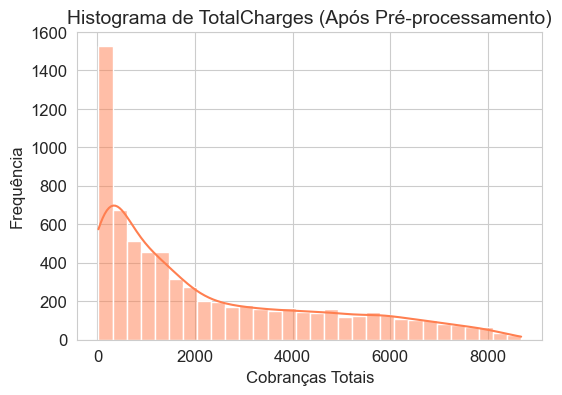

In [20]:
# Re-verificando o resumo estatístico para 'TotalCharges' no df_processed
print("Resumo estatístico para 'TotalCharges' no DataFrame pré-processado:")
print(df_processed['TotalCharges'].describe())

# Opcional: Re-visualizar o histograma de TotalCharges para confirmar que a distribuição é a mesma
# (apenas a garantia de tipo numérico é a novidade aqui)
plt.figure(figsize=(6, 4))
sns.histplot(df_processed['TotalCharges'], kde=True, bins=30, color='coral')
plt.title('Histograma de TotalCharges (Após Pré-processamento)', fontsize=14)
plt.xlabel('Cobranças Totais', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

#### **Análise dos Resultados: Reavaliação de `TotalCharges` Pós-Processamento**

*   **Principais Achados:** O resumo estatístico e o histograma de `TotalCharges` no `df_processed` mostram que a coluna está agora perfeitamente numérica (`float64`), com 7032 entradas (as 11 problemáticas foram removidas) e sem valores `NaN`. A distribuição mantém sua forte assimetria positiva, o que é esperado e reflete a natureza do atributo (clientes novos com baixos `TotalCharges`, e clientes de longa data com altos `TotalCharges`).
*   **Análise dos Resultados:** A principal "nova insight" aqui não é uma mudança na forma da distribuição, mas sim a **validação da qualidade e usabilidade** do dado. Agora, podemos ter total confiança de que `TotalCharges` se comportará como uma variável numérica em qualquer análise ou modelo.
*   **Insights de Negócio e Técnico:** Para a Telco, isso significa que análises financeiras relacionadas ao valor de vida do cliente (que `TotalCharges` reflete) podem ser realizadas com maior precisão. Para a ciência de dados, a feature está pronta para ser utilizada, e sua assimetria ainda pode ser considerada para transformações específicas em etapas de modelagem, se o algoritmo exigir.

No geral, as operações de pré-processamento não revelaram *insights* fundamentalmente novos em termos de relações de dados (as relações com `Churn` permanecem as mesmas), mas sim garantiram que os dados estão em um estado robusto e confiável para as próximas fases do projeto. O DataFrame `df_processed` é agora o nosso conjunto de dados limpo e preparado.


## **4. Conclusão e Próximos Passos**

Este projeto nos guiou por uma análise aprofundada do *churn* de clientes na Telco, desde a definição do problema até a preparação dos dados para modelagem. Demonstramos a importância da engenharia de software para ciência de dados, garantindo que cada etapa fosse bem documentada, justificada e executável.

### **Resumo dos Principais Insights Obtidos e Discussão sobre a Relevância do Trabalho para a Análise de Churn**

Nossa Análise Exploratória de Dados (EDA) revelou *insights* cruciais que podem ser diretamente acionáveis pela Telco:

1.  **Contrato é Rei:** A duração do contrato é o fator mais preditivo de *churn*. Clientes `Month-to-month` são extremamente voláteis.
    *   **Relevância:** A Telco deve focar seus esforços de retenção em transformar clientes mensais em contratos anuais ou bienais, talvez oferecendo descontos significativos ou benefícios exclusivos para contratos mais longos.
2.  **Fibra Óptica e Insatisfação:** Apesar de ser um serviço moderno, a `Fiber optic` está associada a uma alta taxa de *churn*. Clientes de alto valor (`MonthlyCharges`) também churnam mais.
    *   **Relevância:** É vital investigar a experiência do cliente com a fibra óptica. Isso pode envolver pesquisas de satisfação, melhorias na infraestrutura ou no suporte técnico, ou reavaliação da precificação para alinhar com o valor percebido.
3.  **Início Crítico do Ciclo de Vida:** Clientes com baixo `tenure` (novos clientes) são muito mais propensos ao *churn*.
    *   **Relevância:** A Telco precisa intensificar programas de boas-vindas e acompanhamento nos primeiros meses do cliente, garantindo que a adaptação ao serviço seja suave e as expectativas sejam atendidas.
4.  **Serviços de Valor Agregado Retêm:** Clientes sem serviços adicionais (segurança online, suporte técnico, etc.) são mais propensos a *churnar*.
    *   **Relevância:** A empresa deve educar os clientes sobre os benefícios desses serviços e incentivá-los a contratá-los, talvez através de pacotes promocionais ou demonstrações.
5.  **Métodos de Pagamento e Churn:** O `Electronic check` está associado a maior *churn*.
    *   **Relevância:** Investigar se há fricção no processo de pagamento via cheque eletrônico. Incentivar a migração para métodos de pagamento automáticos, que tendem a reter clientes de forma mais passiva.
6.  **Desbalanceamento da Variável Alvo:** A classe `Churn=Yes` é minoritária.
    *   **Relevância:** Este é um *insight* técnico crucial que moldará as próximas etapas de modelagem, garantindo que o modelo seja capaz de identificar os clientes de alto risco de *churn* com eficácia, e não apenas prever a classe majoritária.

Este trabalho demonstrou como transformar dados brutos em inteligência acionável, fornecendo à Telco um entendimento claro sobre os fatores que impulsionam o *churn* e indicando caminhos estratégicos para a retenção de clientes.

### **Sugestões para Futuras Análises ou Desenvolvimento de Modelos Preditivos**

Para aprofundar este projeto e torná-lo ainda mais completo, as seguintes etapas são sugeridas:

1.  **Engenharia de Features (Feature Engineering):**
    *   Explorar a criação de novas *features* a partir das existentes. Por exemplo, criar uma *feature* "Serviços Total Adicionais" que conte o número de serviços adicionais que um cliente possui.
    *   Discretizar `tenure` em categorias (ex: 0-12 meses, 13-24 meses, etc.) para capturar efeitos não-lineares, se apropriado para o modelo.
    *   Criar `MonthlyCharges_per_Tenure` para verificar se há alguma relação de custo-benefício percebida.

2.  **Seleção de Modelos Preditivos e Treinamento:**
    *   **Modelos a Considerar:** Dada a natureza do problema de classificação binária e o desbalanceamento, modelos como Regressão Logística, Random Forest, Gradient Boosting (XGBoost, LightGBM) ou até mesmo Redes Neurais Simples seriam boas opções.
    *   **Estratégias de Balanceamento:** Aplicar técnicas de balanceamento de classes como `SMOTE` (Synthetic Minority Over-sampling Technique) para lidar com o desbalanceamento da variável alvo antes de treinar os modelos.
    *   **Divisão de Dados:** Dividir o dataset em conjuntos de treinamento, validação e teste para uma avaliação robusta do modelo.
    *   **Validação Cruzada:** Utilizar validação cruzada (`k-fold cross-validation`) para obter estimativas mais confiáveis do desempenho do modelo.

3.  **Métricas de Avaliação:**
    *   Além da acurácia, focar em métricas mais adequadas para problemas desbalanceados:
        *   **Recall (Sensibilidade):** A proporção de clientes que realmente churnaram e que o modelo identificou corretamente. Crucial para não perder clientes em risco.
        *   **Precisão (Precision):** A proporção de clientes que o modelo previu como churn e que realmente churnaram. Importante para evitar falsos positivos (clientes retidos desnecessariamente).
        *   **F1-Score:** Média harmônica de precisão e recall, oferecendo um balanço entre as duas.
        *   **Curva ROC AUC:** Mede a capacidade do modelo de distinguir entre as classes, menos sensível ao desbalanceamento.

4.  **Interpretabilidade do Modelo:**
    *   Após o treinamento, interpretar os modelos para entender quais *features* são as mais importantes e como elas influenciam a previsão de *churn* (ex: *feature importance* para modelos baseados em árvore, coeficientes para Regressão Logística). Isso complementaria a EDA e forneceria *insights* adicionais sobre as razões do *churn*.

5.  **Considerações de Implantação:**
    *   Discutir como o modelo poderia ser integrado a sistemas existentes (ex: CRM) para identificar clientes em tempo real e acionar campanhas de retenção.
    *   Monitoramento contínuo do desempenho do modelo em produção e retreinamento periódico com novos dados.

Ao seguir esses próximos passos, o projeto evoluirá para a construção de um sistema preditivo robusto, capaz de auxiliar a Telco a combater o *churn* de forma mais eficiente e proativa, maximizando o valor dos dados e o investimento em Ciência de Dados.